# TIME SERIES - PORT CITY SIMULATION DATA (CNR)

## Introduction


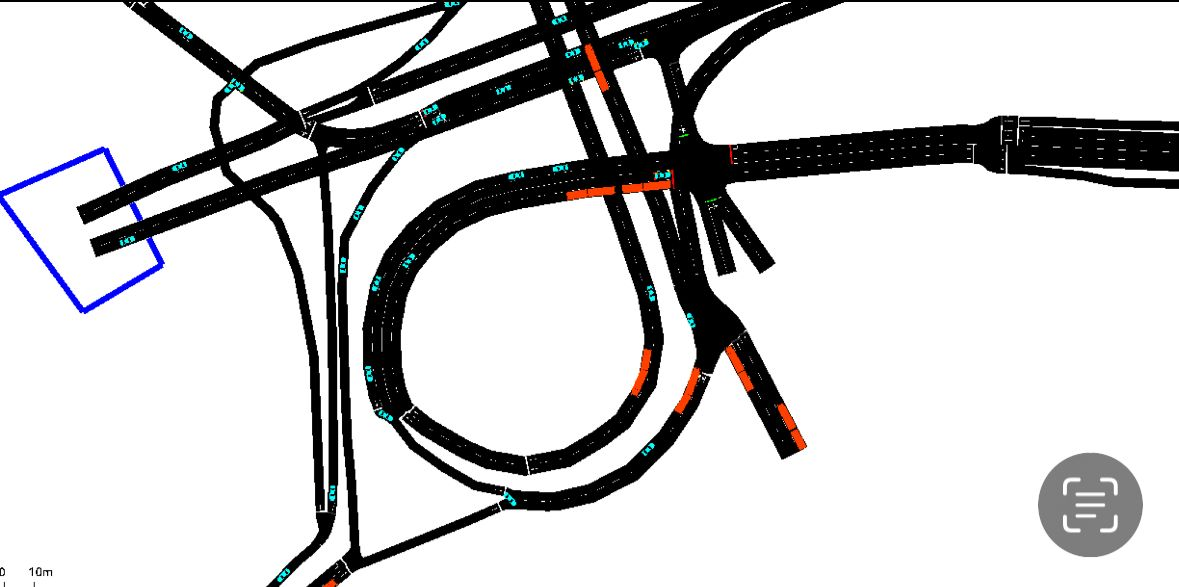


### **Purpose:**
Two pickle files contain data from simulations modeling traffic under two scenarios:
- **Scenario 0:** Standard traffic conditions.
- **Scenario 1:** One port gate is closed, forcing trucks to reroute.

### **Simulation Details:**
- **Runs:** 200 simulations, each lasting 1 hour.
- **Time Frames:** Data is aggregated into 12 time blocks (5 minutes each).
- **Network:** Includes 85 segments (edges).
- **Traffic:** Origin/destination flows of 25 sources (cars and trucks) are drawn from Gaussian distributions.

### **Variables in the Data:**
- **speed_all, speed_cars, speed_trucks:** Average speed on all edges for all vehicles, cars, and trucks respectively.
- **num_cars, num_trucks:** Average number of cars and trucks on all edges.
- **flow_cars, flow_trucks:** Average flow (vehicles reaching the end of edges) for cars and trucks.
- **inflows:** Input origin/destination traffic, reflecting policy changes.

## Import Dependencies & Pickle Files





In [ ]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_scenario_0 = '/content/drive/MyDrive/TESE/data/data_scenario0.pkl'
path_scenario_1 = '/content/drive/MyDrive/TESE/data/data_scenario1.pkl'

def import_pickle(path):
  if os.path.exists(path):
    with open(path, 'rb') as f:
      print("Pickle file imported from: ", path)
      return pickle.load(f)
  else:
    print("File not found.")

data_scenario_0 = import_pickle(path_scenario_0)
data_scenario_1 = import_pickle(path_scenario_1)

Pickle file imported from:  /content/drive/MyDrive/TESE/data_scenario0.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data_scenario1.pkl


## Explore data

In [ ]:
def show_shapes(data):
  for key, value in data.items():
    print(f"Variable: {key}")
    print(data['speed_all'].shape)
    print(type(data['speed_all']))
    print("-" * 20)

print("SCENARIO 0 \n")
show_shapes(data_scenario_0)
print("\n\n")
print("SCENARIO 1 \n")
show_shapes(data_scenario_1)

SCENARIO 0 

Variable: speed_all
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: speed_cars
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: speed_trucks
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: num_cars
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: num_trucks
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: flow_cars
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: flow_trucks
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: inflows
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------



SCENARIO 1 

Variable: speed_all
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: speed_cars
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: speed_trucks
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: num_cars
(200, 85, 12)
<class 'numpy.ndarray'>
--------------------
Variable: num_tr

## Define variables

### Key Points for Analysis

The points identified are locations with the **highest interactions of car and truck flows**. These are expected to be most impacted by policy changes. The points are as follows:

#### 1. Lungomare Canepa (Eastbound)
- **Description**: Gathers traffic from trucks and cars moving west towards the Genova Ovest highway booth, and the east part of the city.  
- **Additional Traffic**: Includes trucks coming from the Etiopia Gate.

#### 2. Via di Francia (Eastbound)
- **Description**: Often congested, especially during heavy ferry traffic.

#### 3. Elicoidale "Downstream"
- **Location**: Part of the Elicoidale roundabout near the Genova Ovest highway booth.  
- **Description**: Collects trucks from the highway and mobility traffic.

#### 4. Elicoidale "Upstream"
- **Location**: Another portion of the Elicoidale roundabout, handling trucks coming from the San Benigno Gate.  
- **Description**: Routes traffic towards the Genova Ovest highway booth and mobility traffic.

---

### Corresponding Data Indices

In the data provided, these points correspond to the following indices in the matrices (range: 0–84 in Python style):

| **Point**            | **Index** |
|-----------------------|-----------|
| Lungomare Canepa     | 43        |
| Via di Francia        | 70        |
| Elicoidale "Downstream" | 6       |
| Elicoidale "Upstream" | 62        |

---

### Additional Notes

- **Initial Selection**: These points were chosen **a priori**, based on expected behavior.  
- **Further Adjustments**: Modifications might be needed as insights are derived from the analysis.  
- **Starting Point**: These locations provide a solid foundation for the analysis.

In [ ]:
# Define the road segment k
interesting_k=[6, 43, 62, 70]

# Define the list of variables and their names
variables_s0 = [data_scenario_0['speed_cars'],data_scenario_0['speed_trucks'],
                data_scenario_0['num_cars'], data_scenario_0['num_trucks'],
                data_scenario_0['flow_cars'], data_scenario_0['flow_trucks']]

variables_s1 = [data_scenario_1['speed_cars'],data_scenario_1['speed_trucks'],
                data_scenario_1['num_cars'], data_scenario_1['num_trucks'],
                data_scenario_1['flow_cars'], data_scenario_1['flow_trucks']]

variable_names = ["Speed Cars", "Speed Trucks", "Number of Cars", "Number of Trucks", "Flow Cars", "Flow Trucks"]

## Visualize TS

Here, we are monitoring day-wise time series. This means that we need to have times series at a fixed time (e.g. 9:05) for all the available days (simulation runs). In other words, the time variable of the TS is the simulation run n.

In [ ]:
def plot_timechunks_side_by_side(k, variables_s0, variables_s1, variable_names):
    for t in range(12):
        fig, axes = plt.subplots(len(variable_names), 1, figsize=(8, 6 * len(variable_names))) #single column
        fig.suptitle(f"Segment {k} - Time Chunk {t + 1}", fontsize=16)

        for i, (var_s0, var_s1, name) in enumerate(zip(variables_s0, variables_s1, variable_names)):
            data_s0 = var_s0[:, k, t]
            data_s1 = var_s1[:, k, t]

            axes[i].plot(data_s0, label=f"{name} - Scenario 0")
            axes[i].plot(data_s1, label=f"{name} - Scenario 1") #plot in same subplot
            axes[i].set_title(name)
            axes[i].set_xlabel("Runs")
            axes[i].set_ylabel("Values")
            axes[i].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

# Call the function
for k in interesting_k:
  plot_timechunks_side_by_side(k, variables_s0, variables_s1, variable_names)

In [ ]:
def plot_timechunks_side_by_side(k, variables_s0, variables_s1, variable_names):
    num_time_chunks = 12  # Number of time chunks
    num_variables = len(variable_names)  # Number of variables

    # Create a figure with a grid for subplots: one row per time chunk, multiple columns per variable
    fig, axes = plt.subplots(
        nrows=num_time_chunks,
        ncols=num_variables,
        figsize=(5 * num_variables, 4 * num_time_chunks),
        constrained_layout=True
    )
    fig.suptitle(f"Segment {k} - Comparison of Time Chunks", fontsize=16, y=0.98)

    # Iterate through time chunks and variables to populate the subplots
    for t in range(num_time_chunks):
        for i, (var_s0, var_s1, name) in enumerate(zip(variables_s0, variables_s1, variable_names)):
            # Extract the data for the current time chunk and variable
            data_s0 = var_s0[:, k, t]
            data_s1 = var_s1[:, k, t]

            # Plot in the appropriate subplot
            ax = axes[t, i] if num_time_chunks > 1 else axes[i]
            ax.plot(data_s0, label=f"{name} - Scenario 0")
            ax.plot(data_s1, label=f"{name} - Scenario 1")
            ax.set_title(f"Time Chunk {t + 1} - {name}")
            ax.set_xlabel("Runs")
            ax.set_ylabel("Values")
            ax.legend()

    plt.show()

### Segment 6 - Elicoidal Downstream

In [ ]:
plot_timechunks_side_by_side(6, variables_s0, variables_s1, variable_names)

Output hidden; open in https://colab.research.google.com to view.

### Segment 43 - Lungomare Canepa

In [ ]:
plot_timechunks_side_by_side(43, variables_s0, variables_s1, variable_names)

Output hidden; open in https://colab.research.google.com to view.

### Segment 62 - Elicoidal Upstream

In [ ]:
plot_timechunks_side_by_side(62, variables_s0, variables_s1, variable_names)

Output hidden; open in https://colab.research.google.com to view.

### Segment 70 - Via di Francia

In [ ]:
plot_timechunks_side_by_side(70, variables_s0, variables_s1, variable_names)

Output hidden; open in https://colab.research.google.com to view.

# past

In [ ]:
def plot_all_chunks(variables):
  # Set up the grid for subplots
  fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
  axes = axes.flatten()  # Flatten axes array for easy indexing

  # Colors and line styles for better distinction
  colors = ['b', 'g', 'r', 'c', 'm', 'y']
  line_styles = ['-', '-', '-', '-', '-', '-']

  # Loop through each time chunk
  for t in range(12):
      ax = axes[t]

      for i, (var, name) in enumerate(zip(variables, variable_names)):
          # Extract data for the segment `k` and time chunk `t`
          data = var[:, k, t]

          # Plot the data
          ax.plot(data, label=name, color=colors[i], linestyle=line_styles[i], linewidth=1.5)

      # Add title and grid
      ax.set_title(f"Time Chunk {t+1}", fontsize=14)
      ax.grid(True, linestyle='--', alpha=0.6)

  # Set global x and y labels
  fig.text(0.5, 0.04, 'Simulation Runs', ha='center', fontsize=16)
  fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical', fontsize=16)

  # Add a single legend for all subplots
  fig.legend(variable_names, loc='upper center', ncol=6, fontsize=12, bbox_to_anchor=(0.5, 1.02))

  # Adjust layout to prevent overlapping
  plt.tight_layout(rect=[0, 0, 1, 0.95])

  # Show the plots
  plt.show()

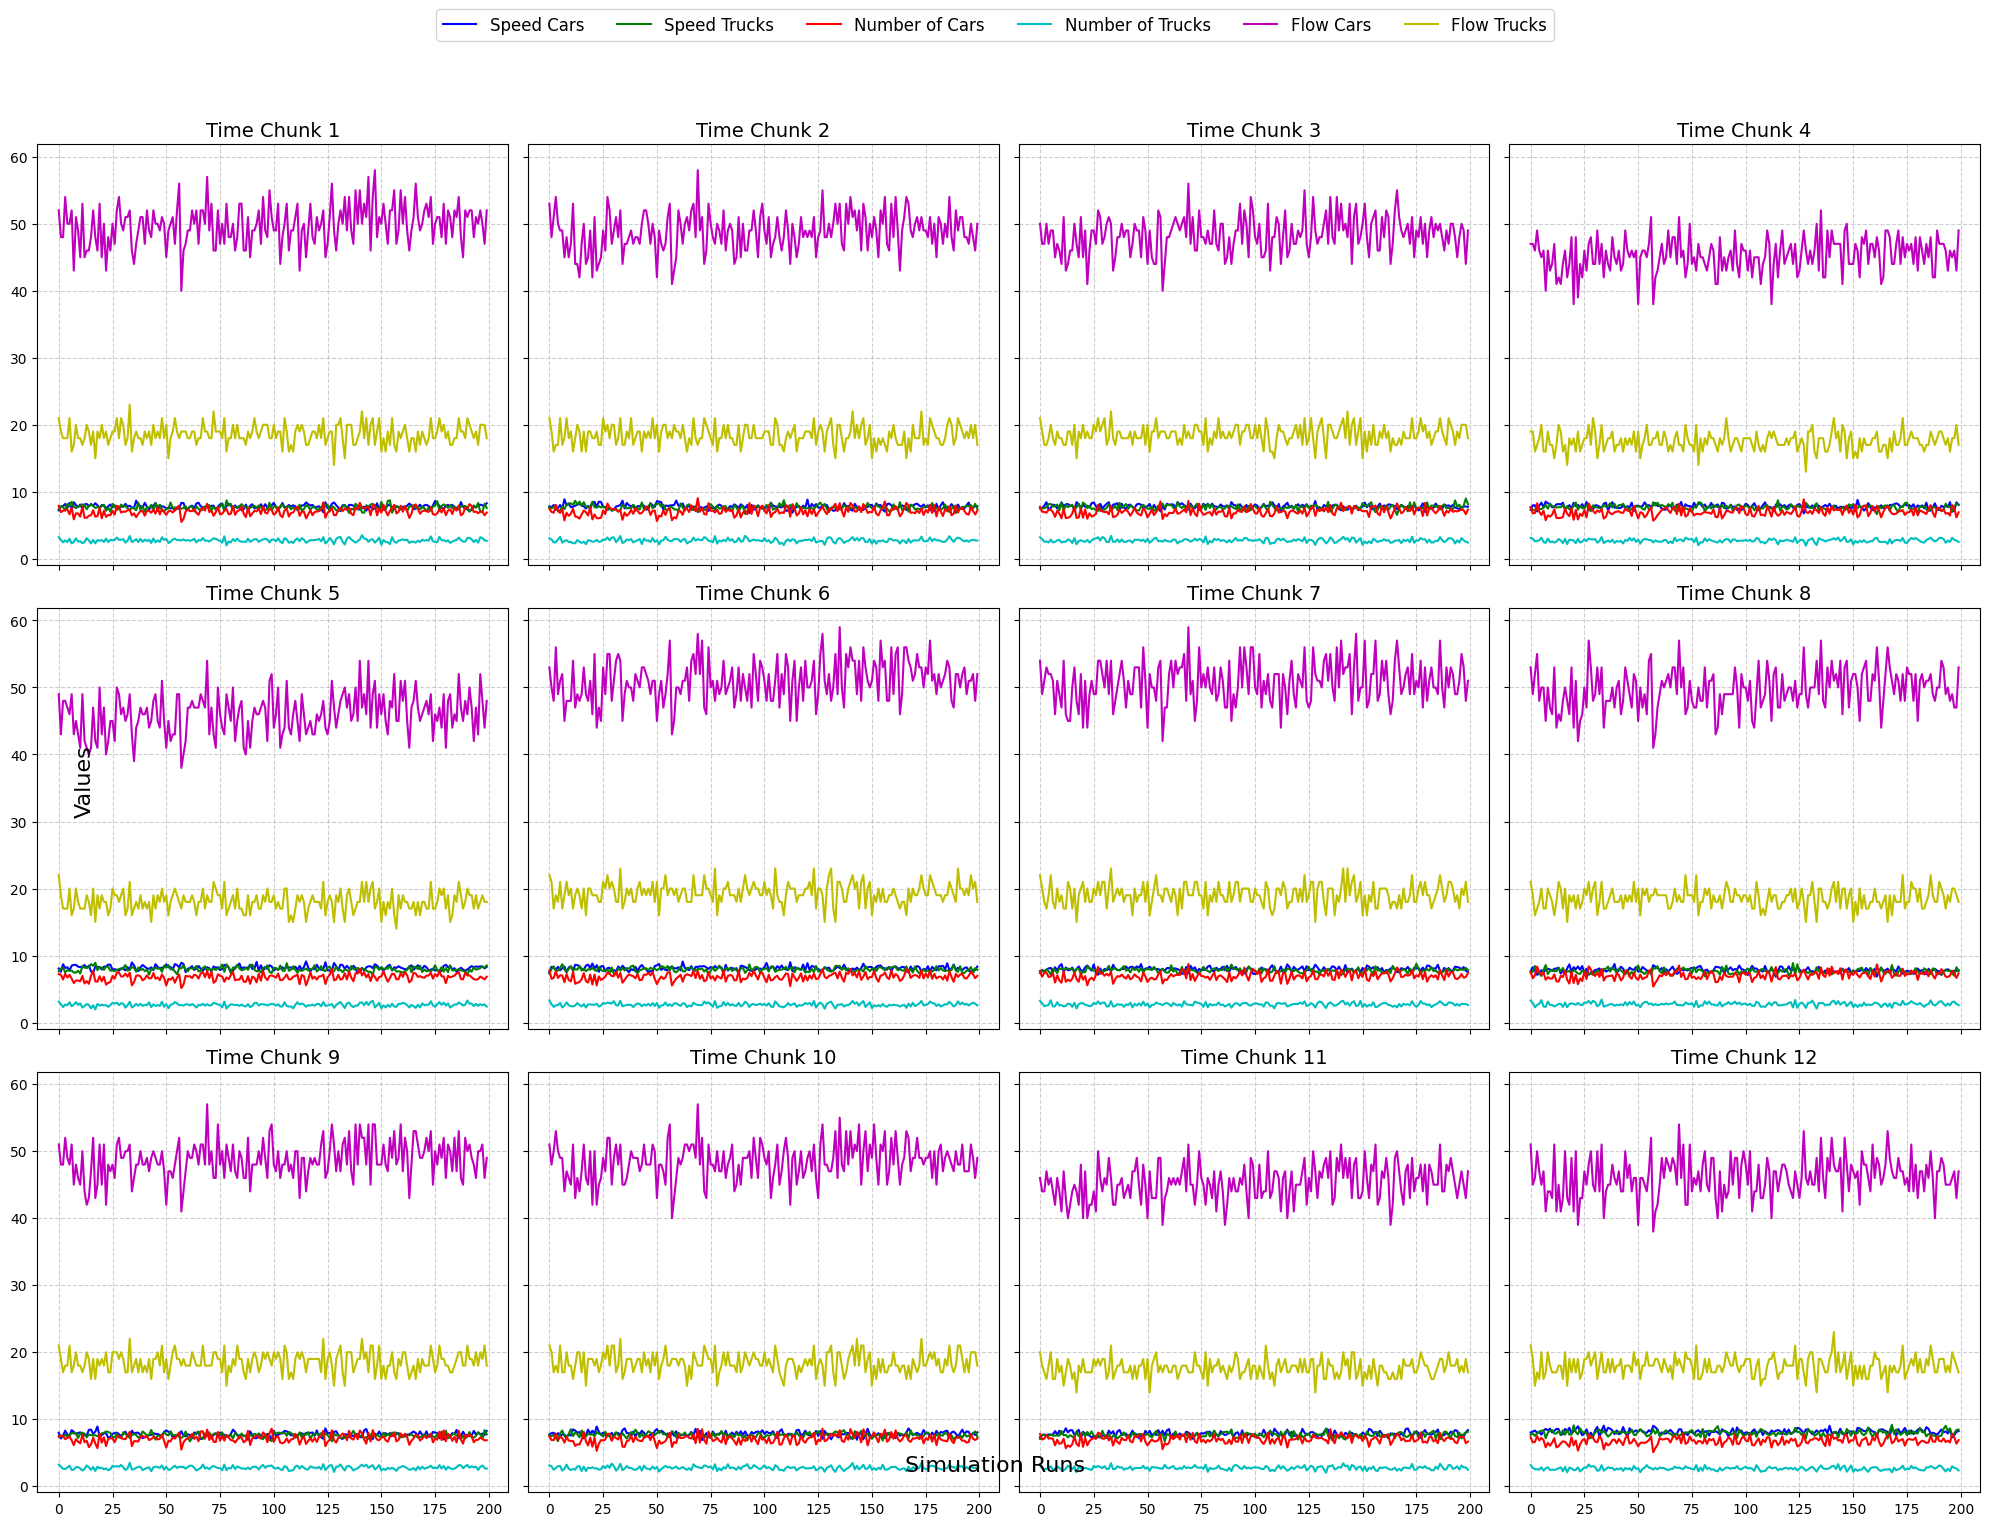

In [ ]:
plot_all_chunks(variables_s0)

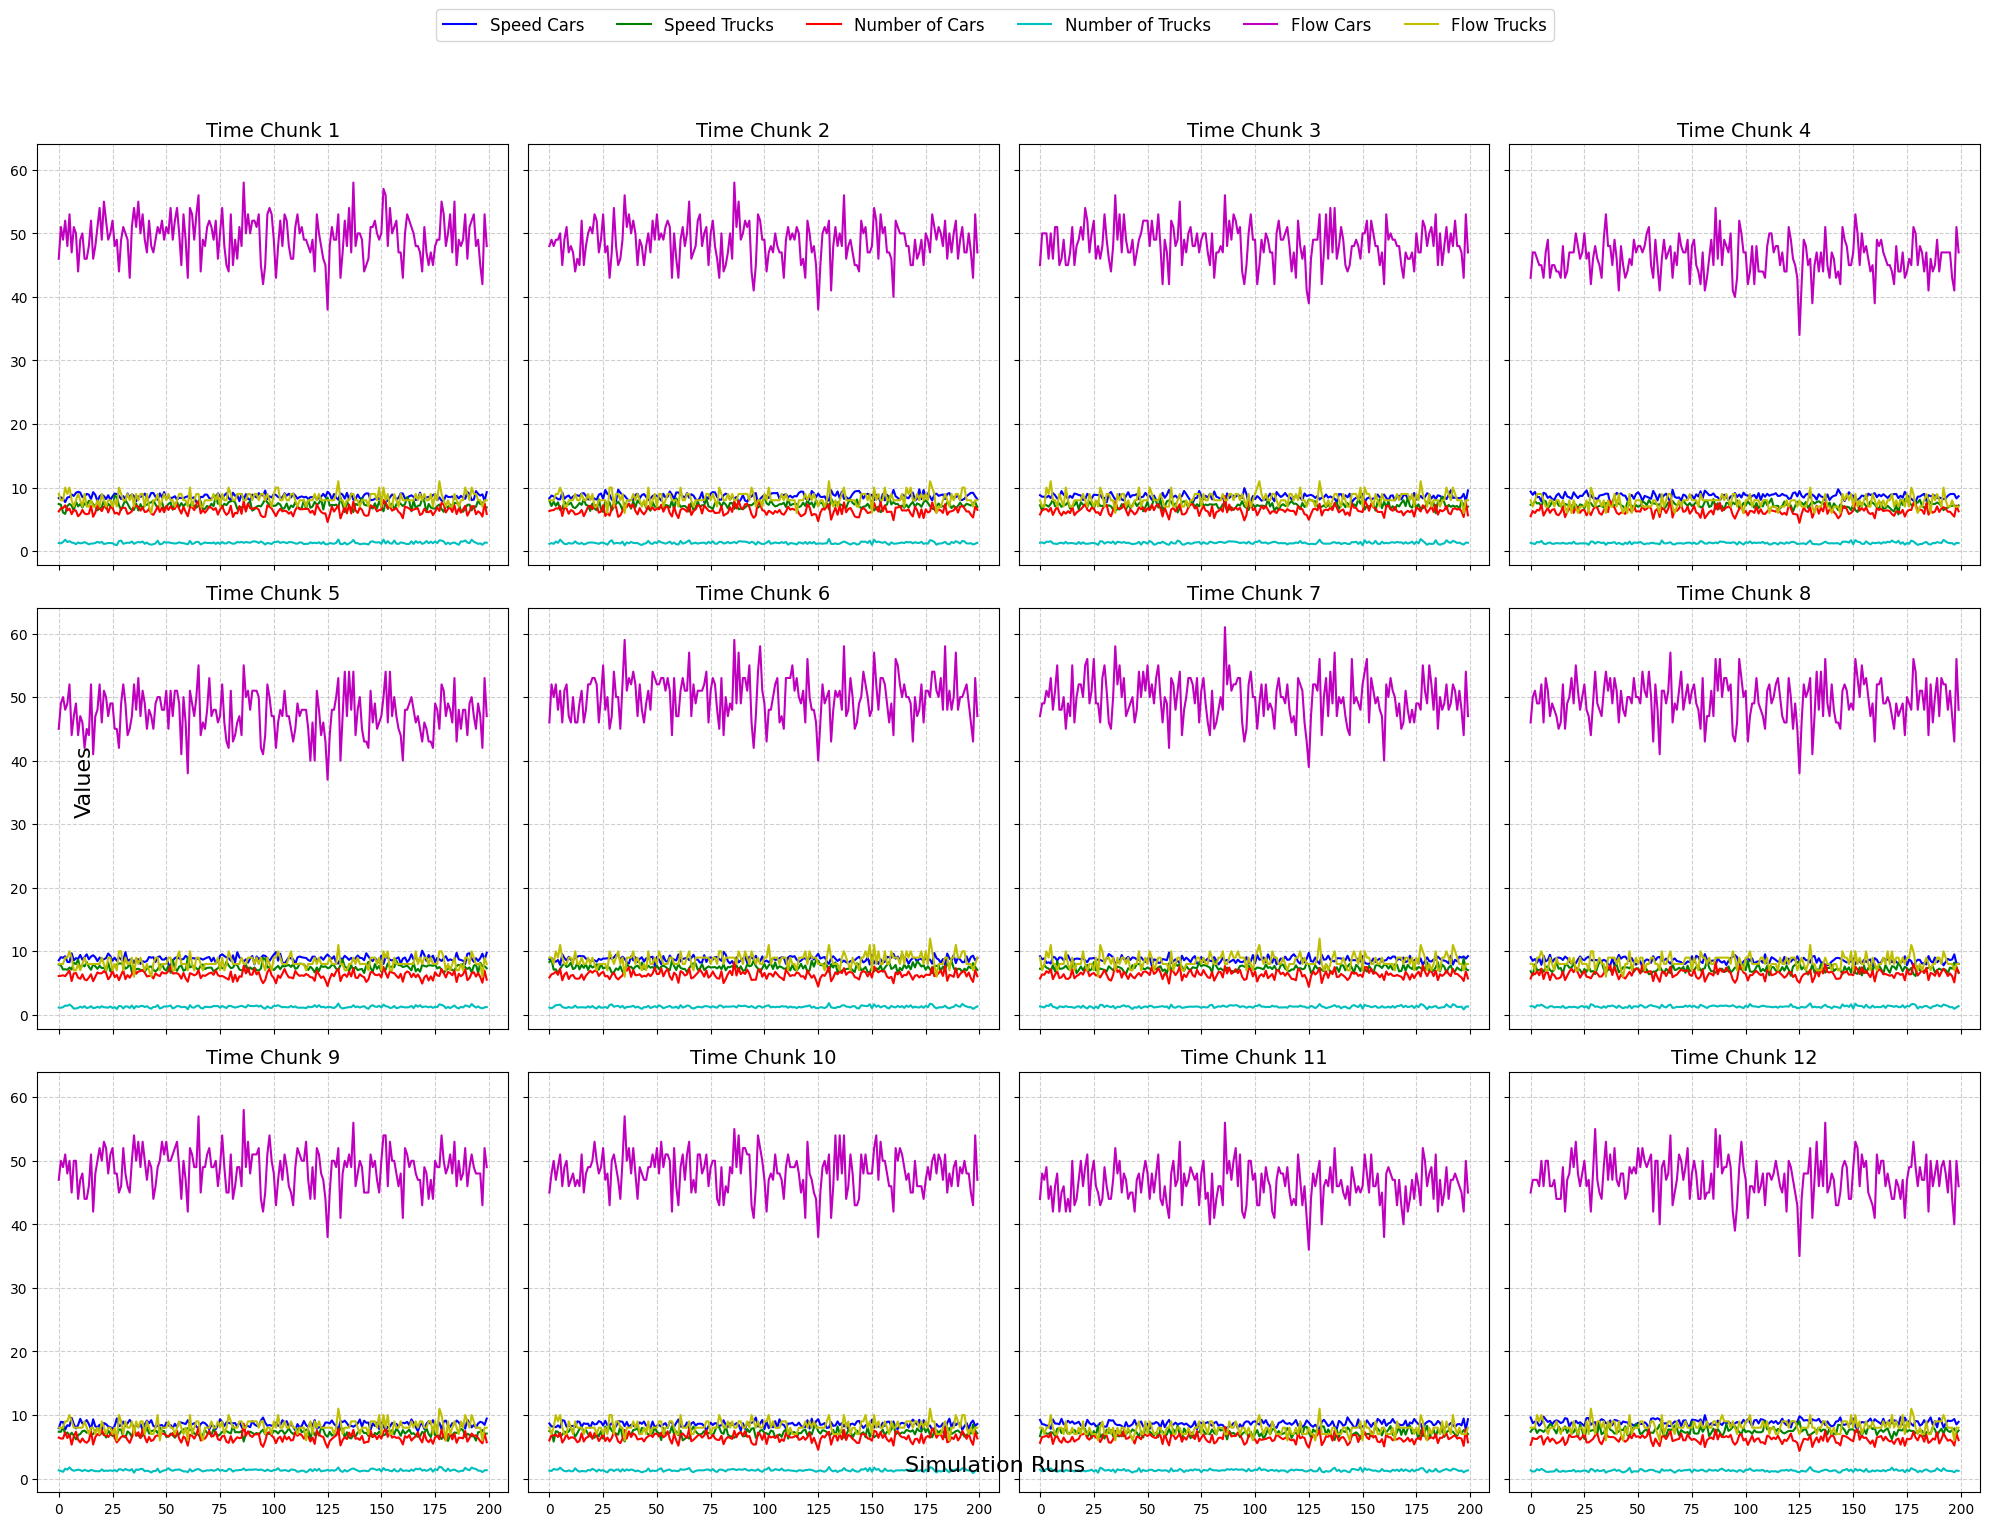

In [ ]:
plot_all_chunks(variables_s1)

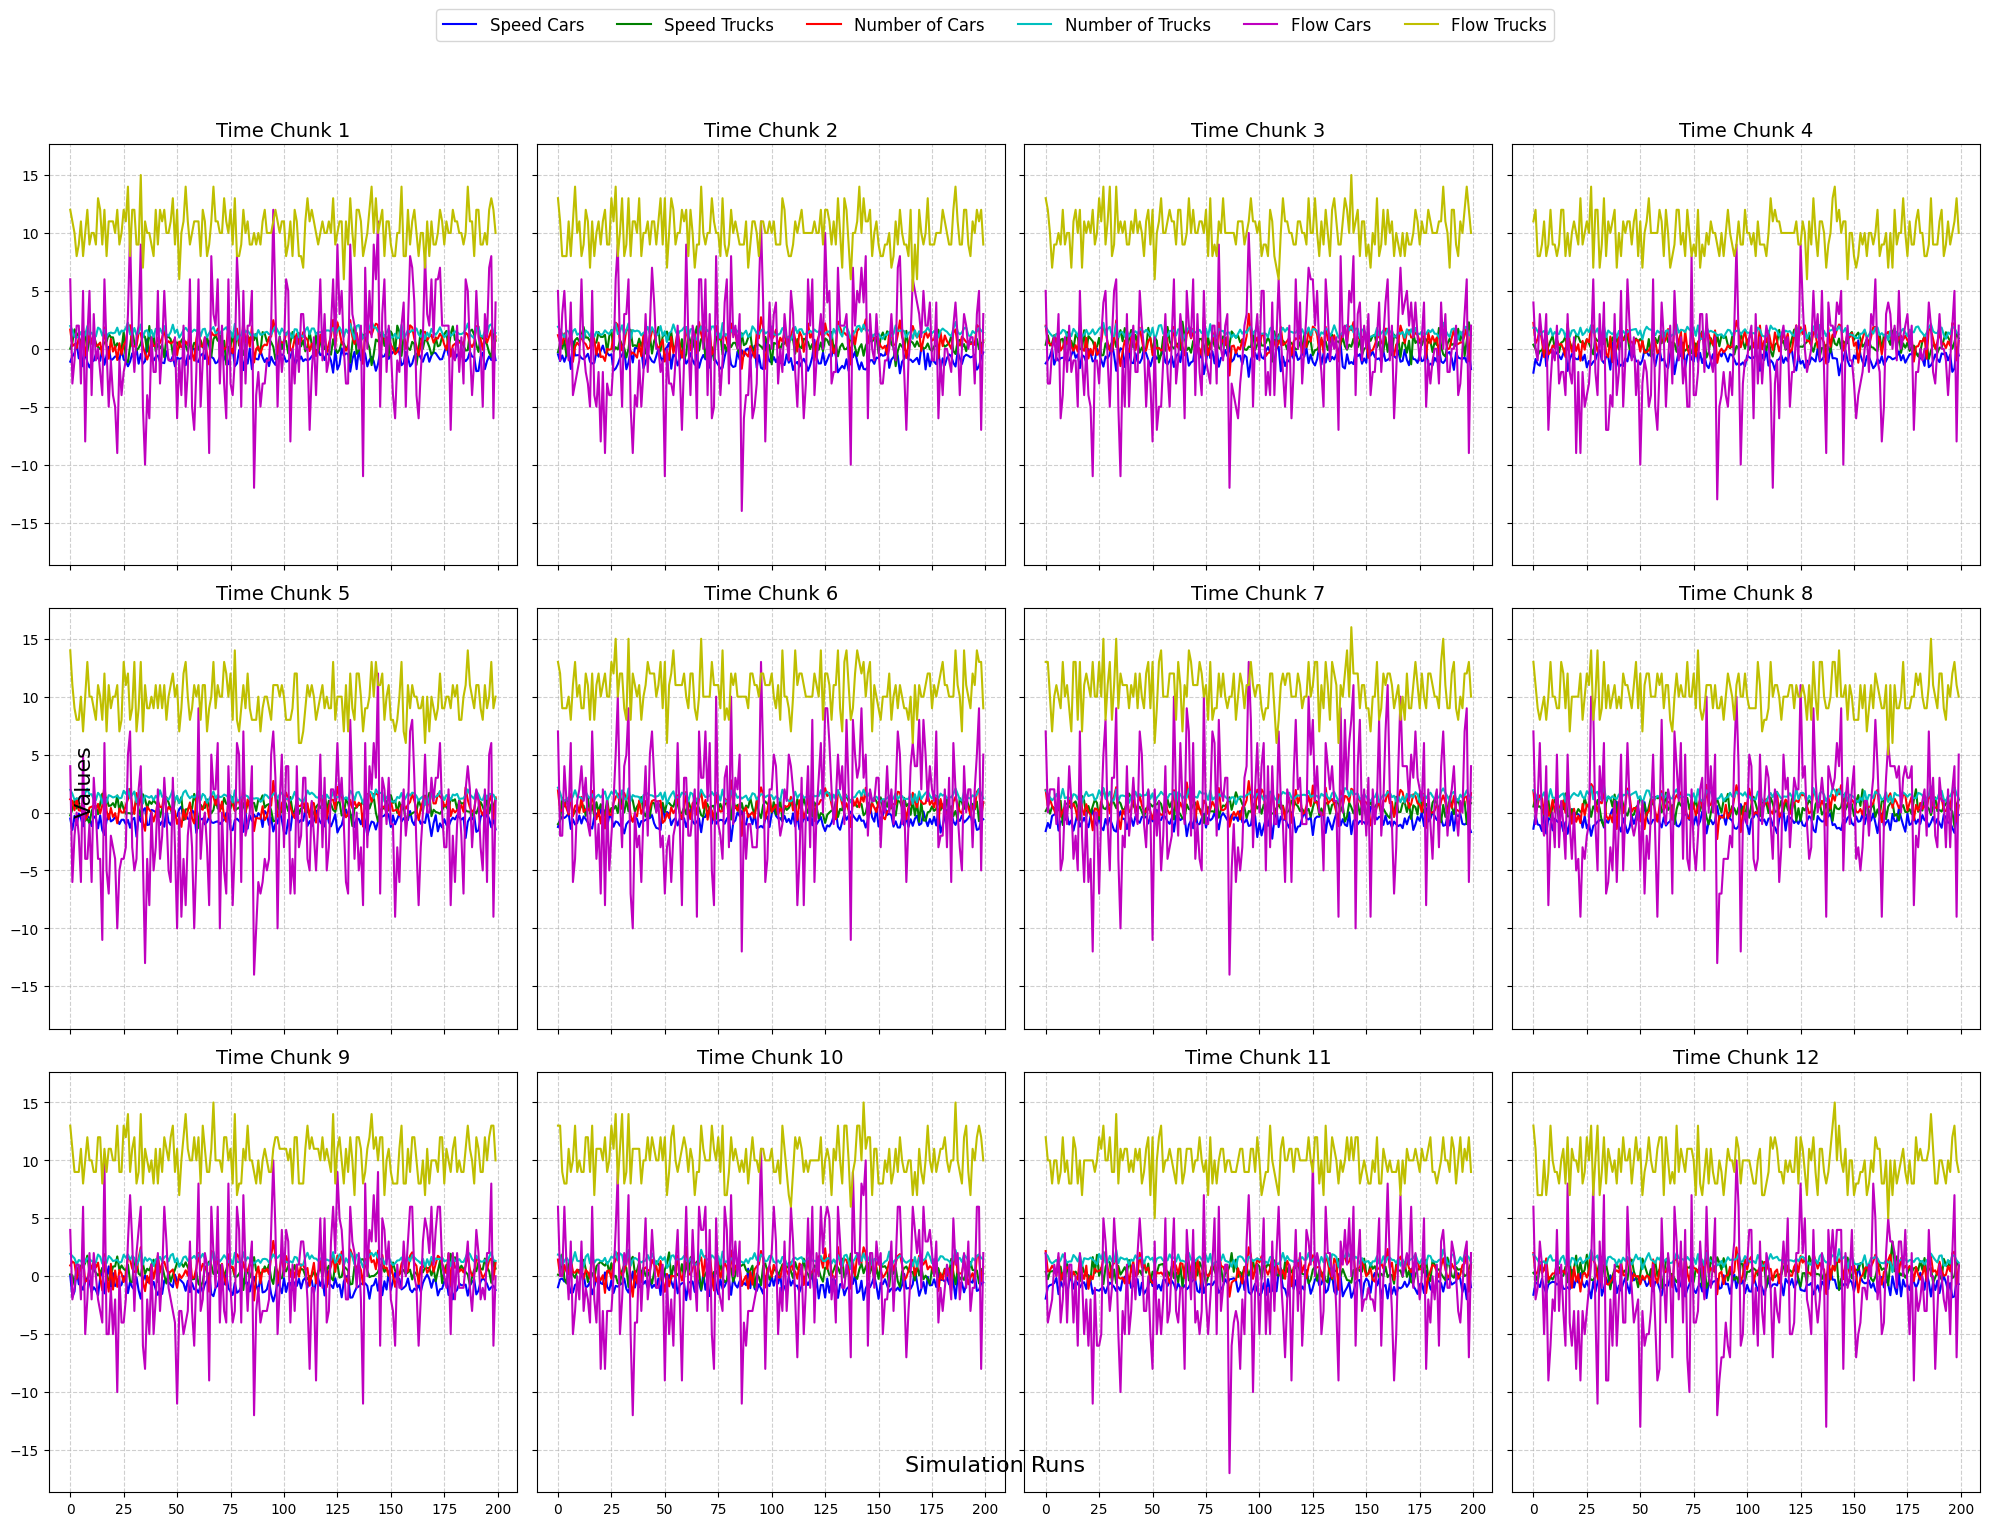

In [ ]:
# prompt: take the residuals of the differences of the same of variables_s0 and variables_s1 and apply the function plot_all_chunks

import matplotlib.pyplot as plt

# Calculate residuals
residuals = []
for var_s0, var_s1 in zip(variables_s0, variables_s1):
    residual = var_s0 - var_s1
    residuals.append(residual)

# Plot the residuals
my_residuals = residuals
plot_all_chunks(residuals)

In [ ]:

def plot_aggregated_view_for_segment(k, variables):
# Calculate aggregated statistics (mean across time chunks)
  aggregated_data = [var[:, k, :].mean(axis=1) for var in variables]

  # Plot the aggregated data
  plt.figure(figsize=(12, 8))

  # Colors and line styles for distinction
  colors = ['b', 'g', 'r', 'c', 'm', 'y']
  line_styles = ['-', '--', '-.', ':', '-', '--']

  for i, (data, name) in enumerate(zip(aggregated_data, variable_names)):
      plt.plot(data, label=name, color=colors[i], linestyle=line_styles[i], linewidth=1.5)

  # Add title, labels, and legend
  plt.title(f"Aggregated Data for Segment {k}", fontsize=16)
  plt.xlabel("Simulation Runs", fontsize=14)
  plt.ylabel("Aggregated Values (Mean Across Time Chunks)", fontsize=14)
  plt.legend(fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.6)

  # Show the plot
  plt.tight_layout()
  plt.show()

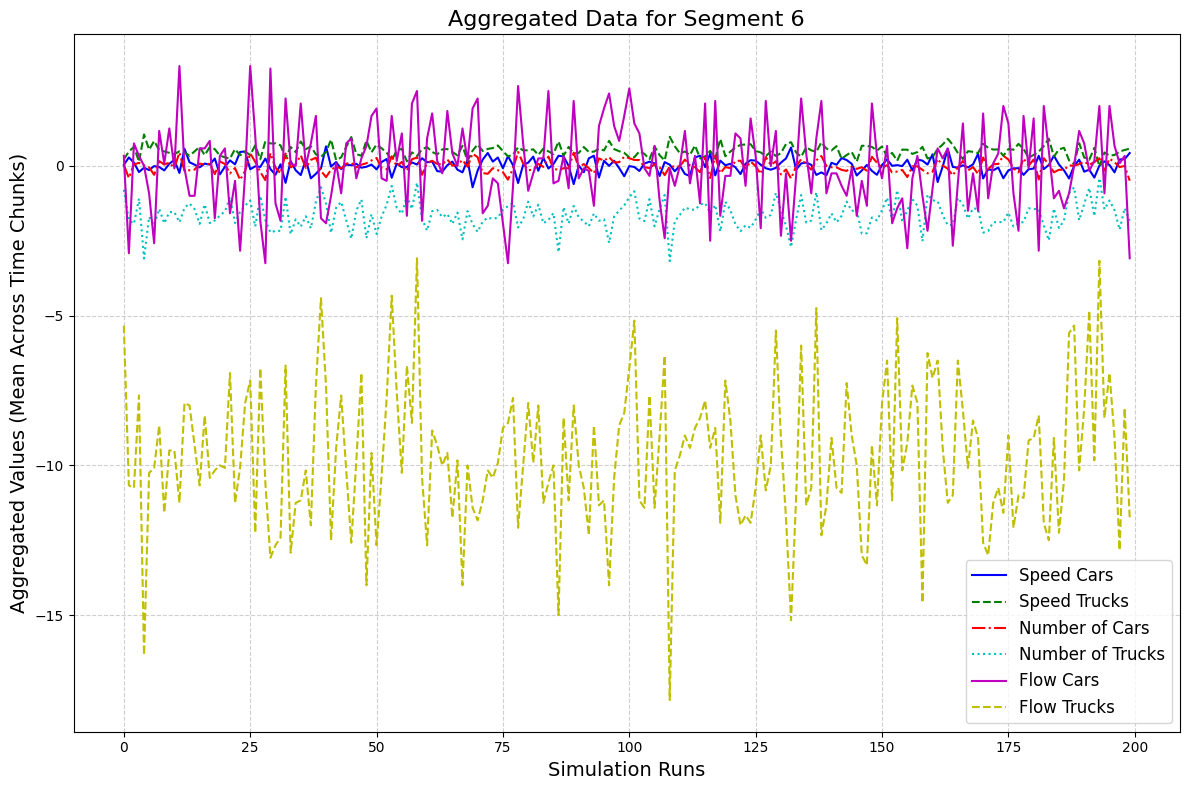

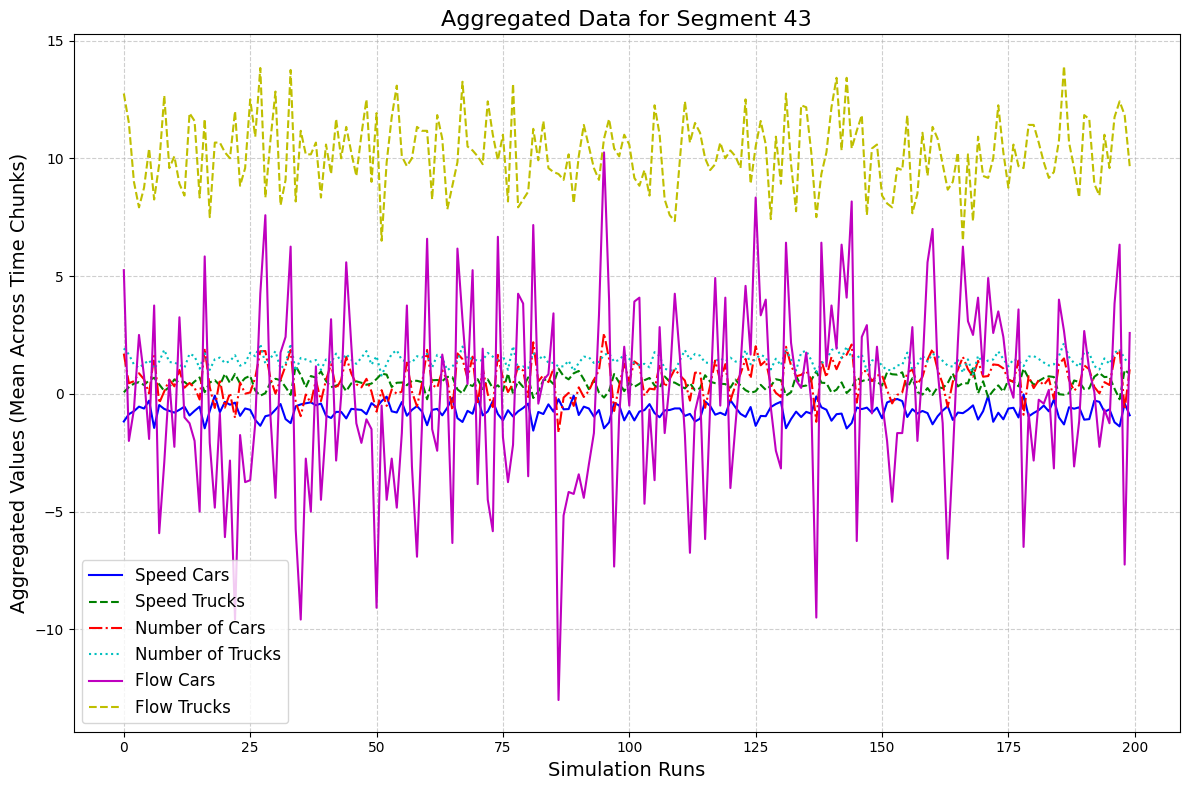

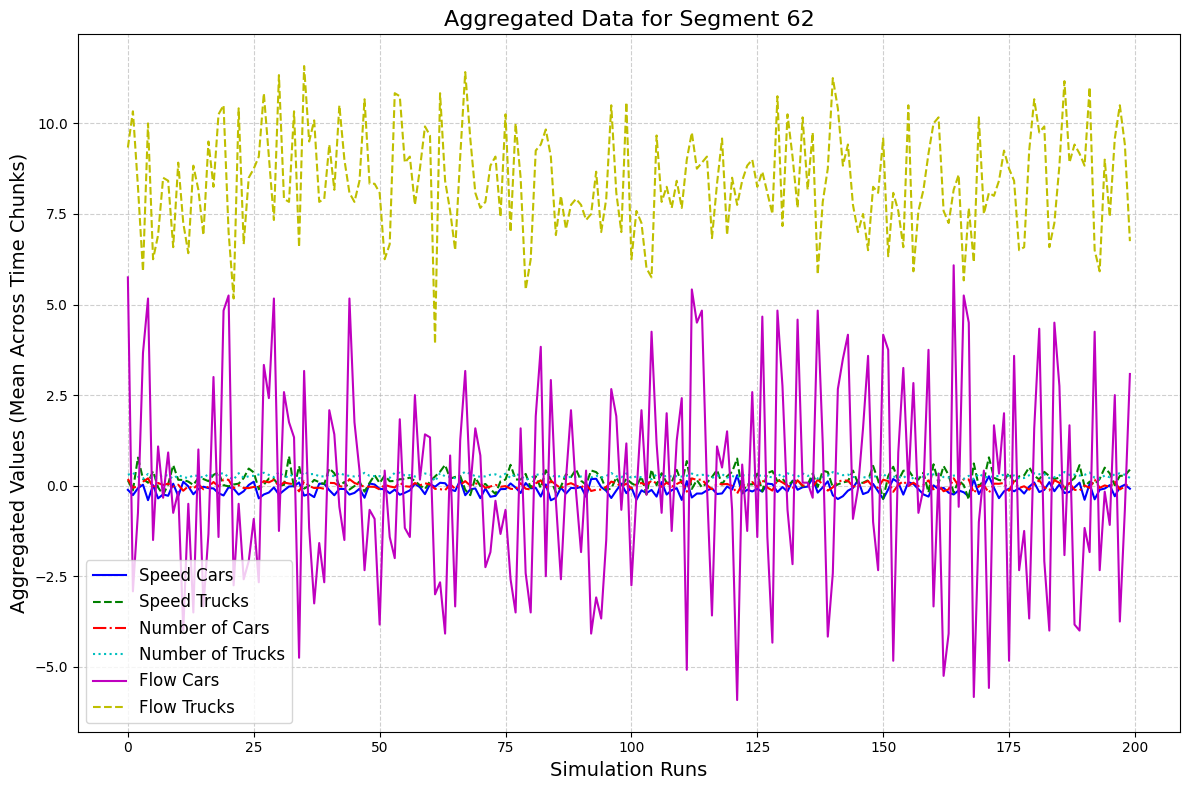

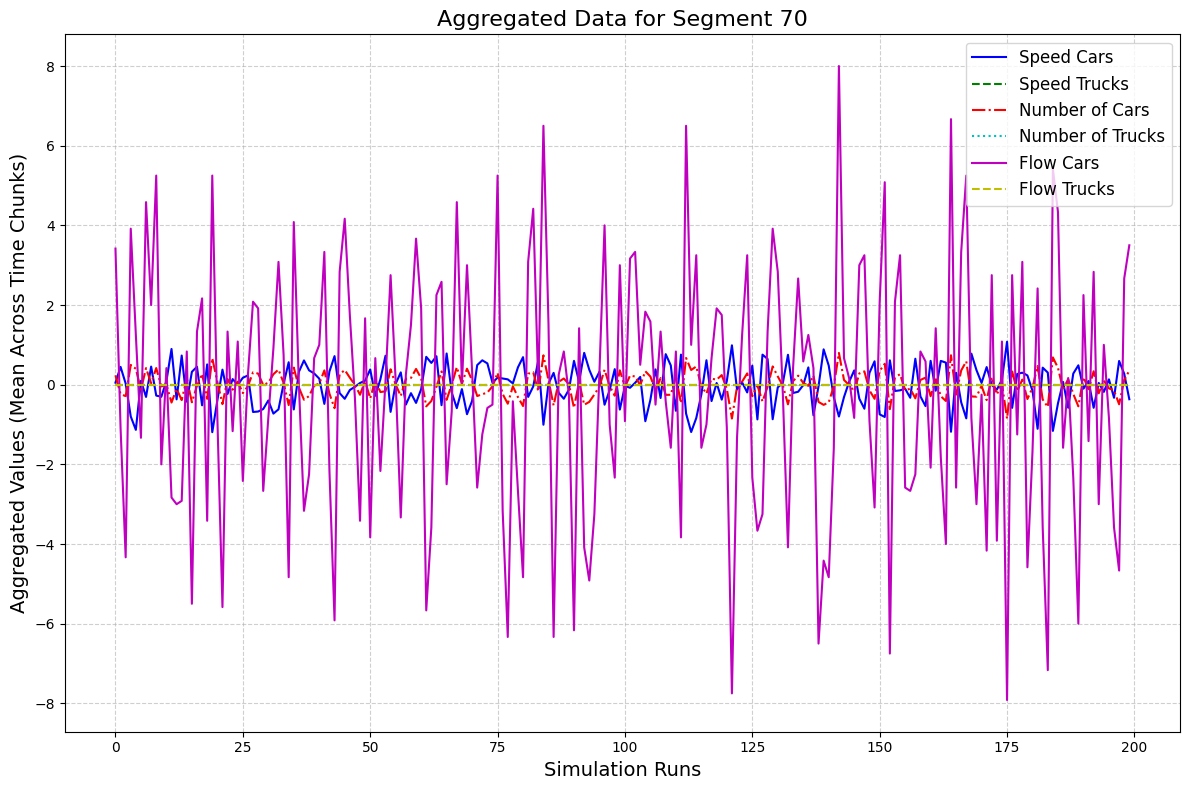

In [ ]:
interesting_k=[6, 43, 62, 70]
for i in interesting_k:
  plot_aggregated_view_for_segment(i, residuals)

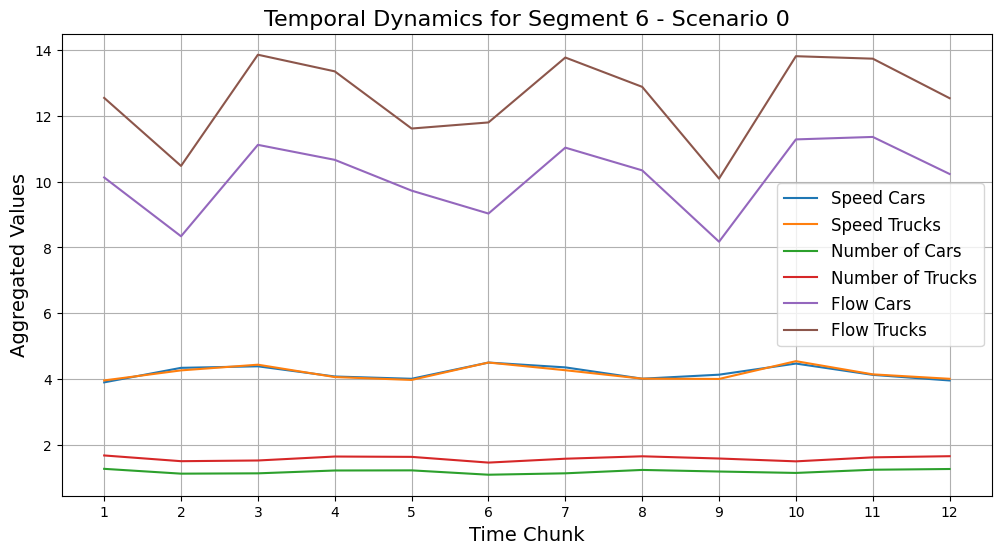

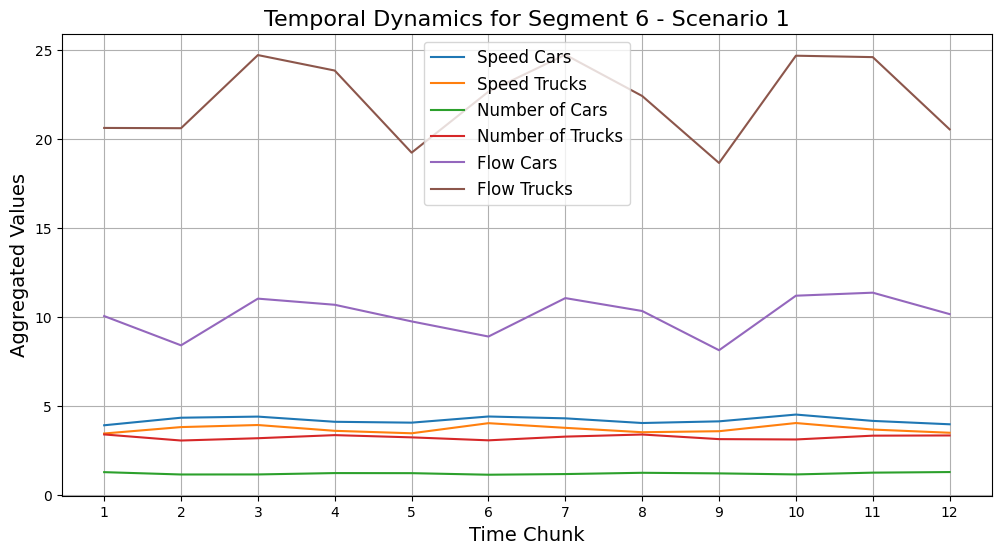

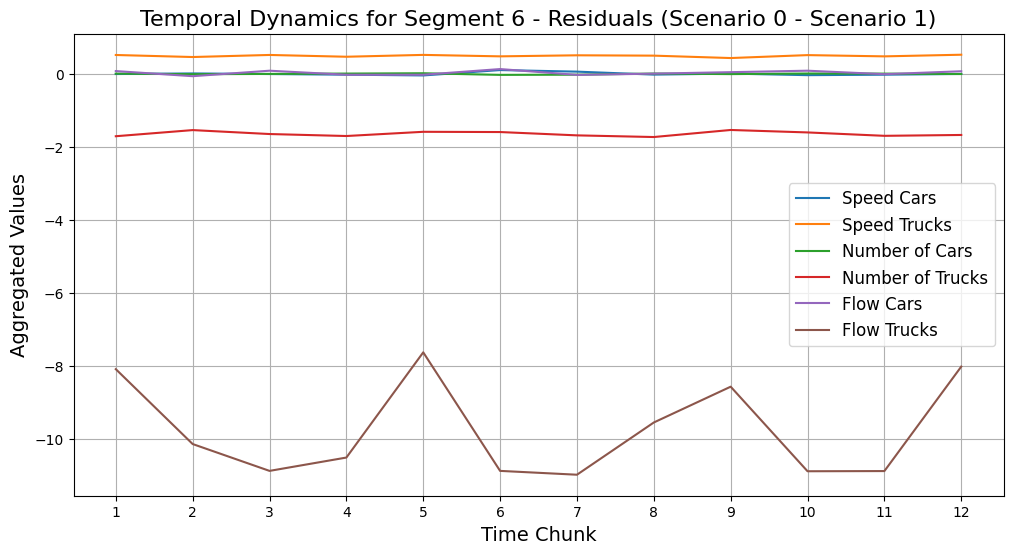

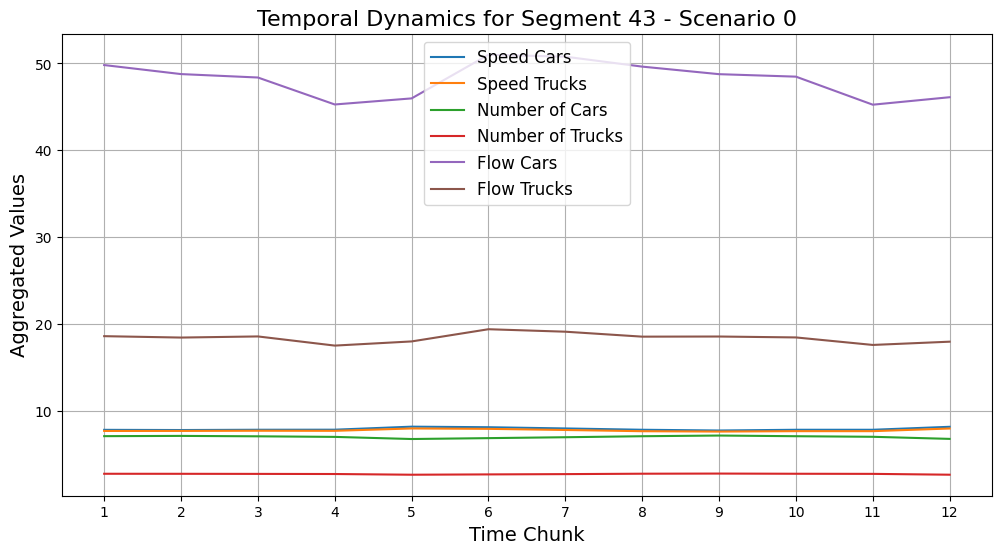

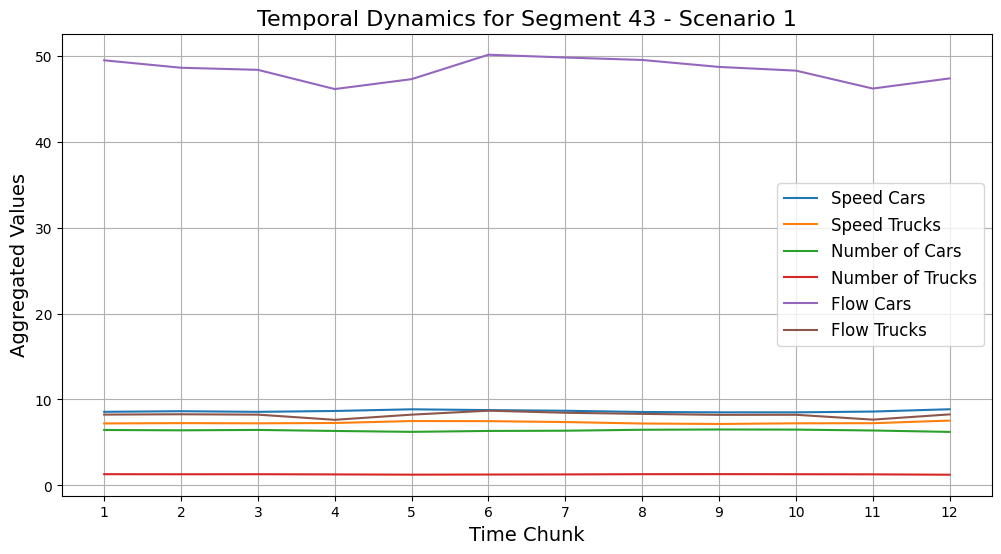

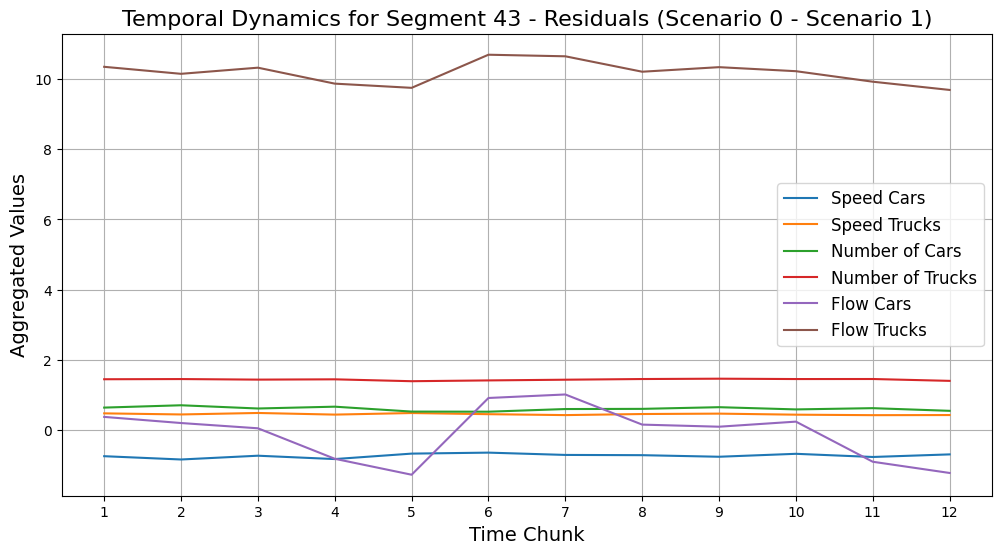

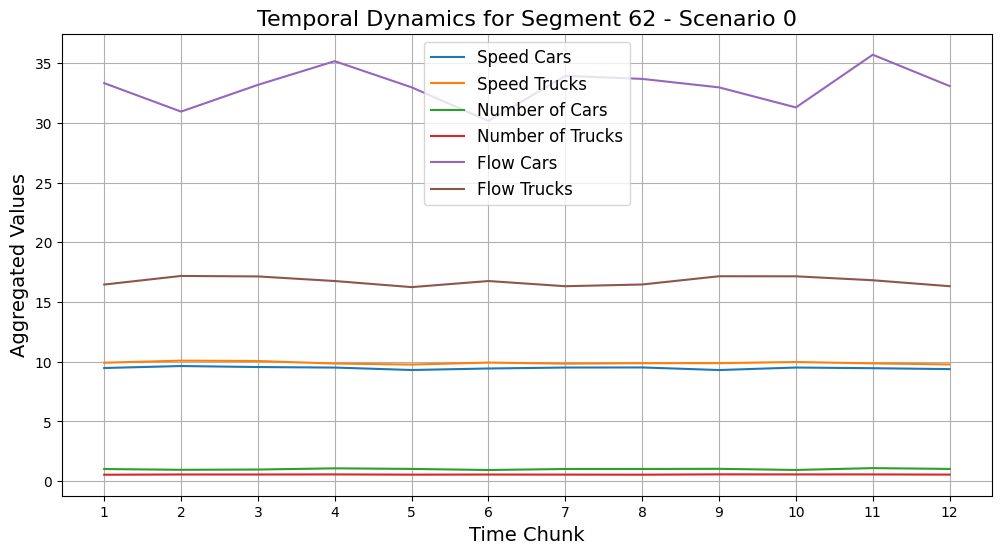

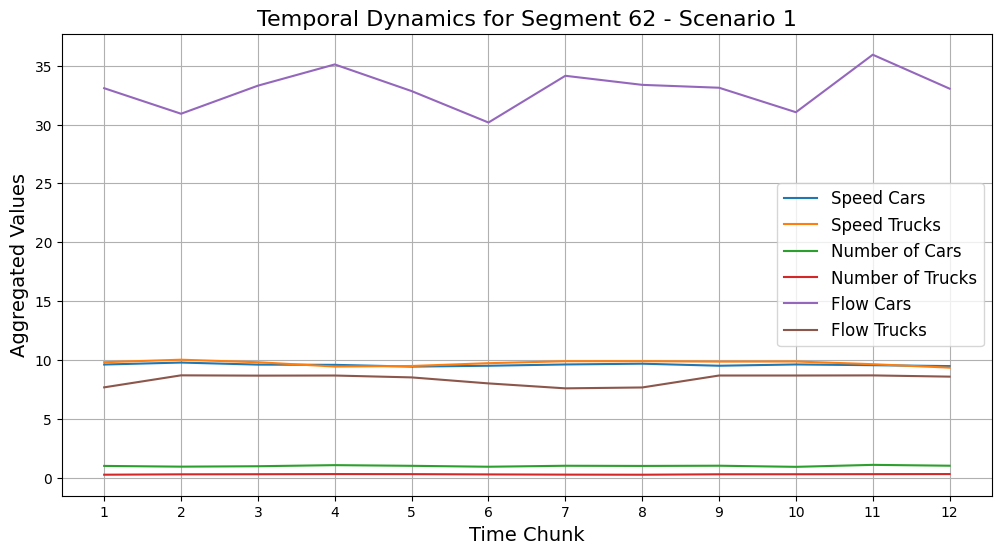

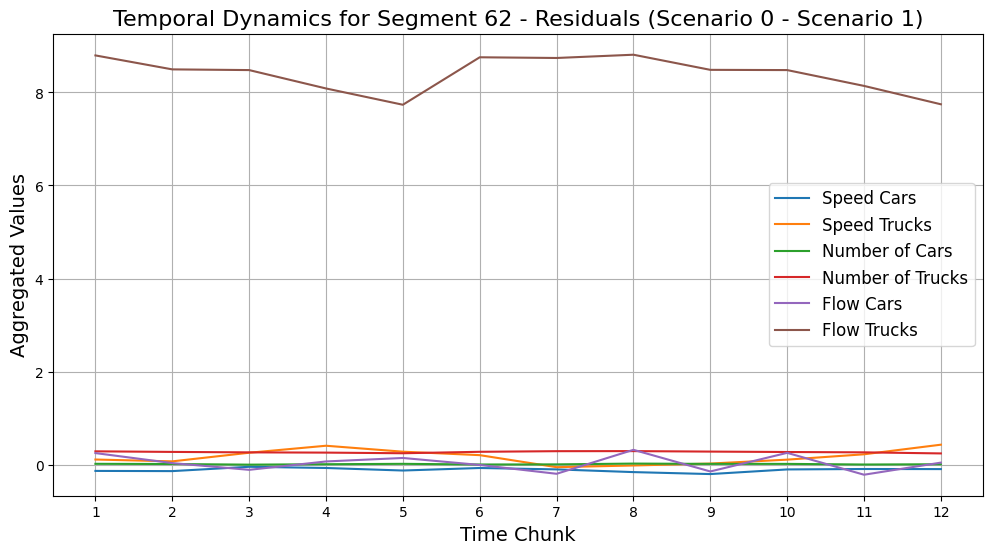

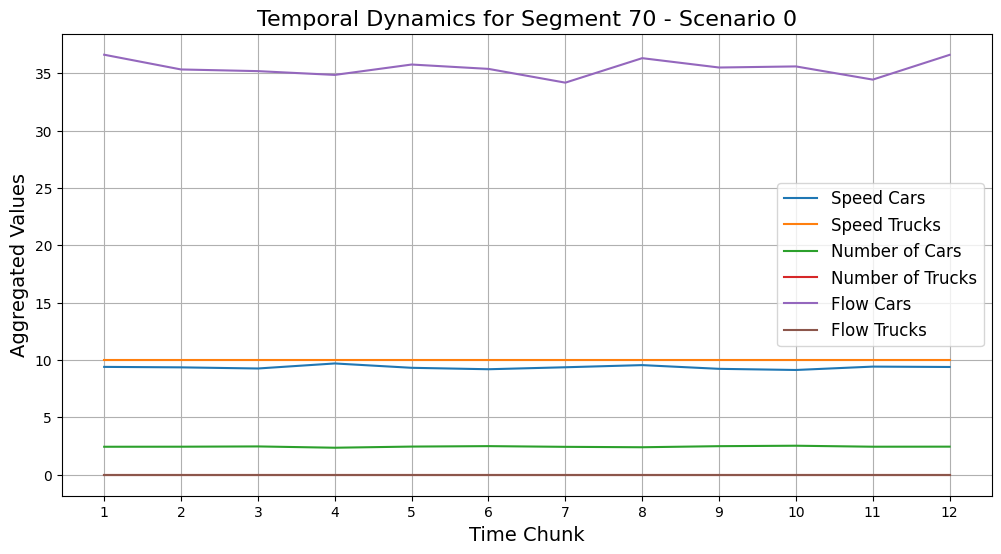

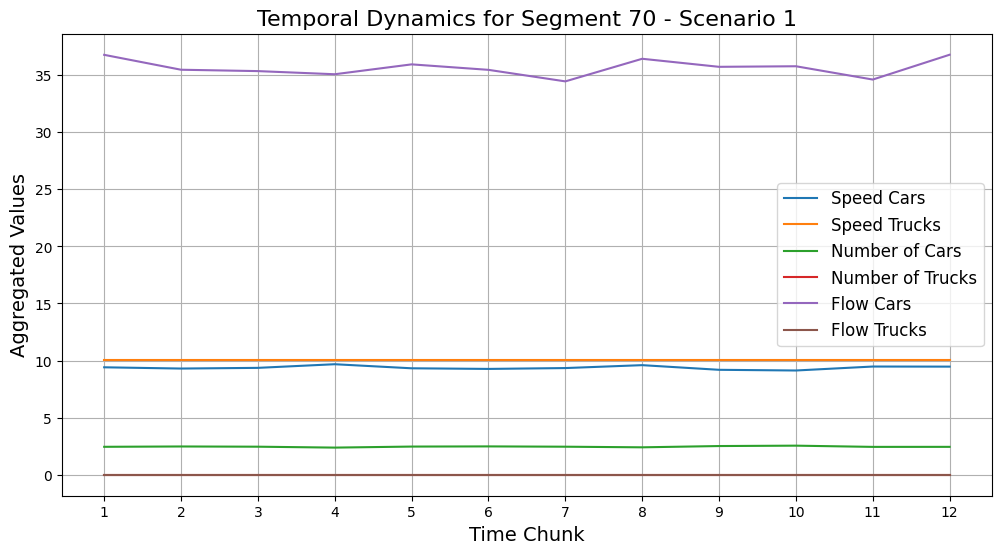

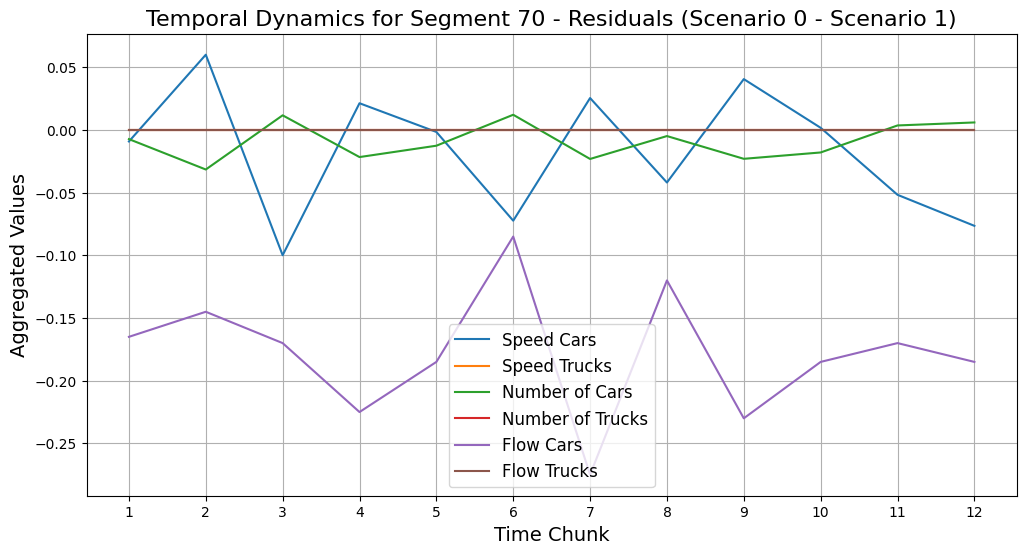

In [ ]:
def plot_temporal_dynamics(k, variables, scenario_name):
    variable_names = ["Speed Cars", "Speed Trucks", "Number of Cars", "Number of Trucks", "Flow Cars", "Flow Trucks"]

    #Aggregate across all runs
    aggregated_data_by_time_chunk = [np.mean(var[:, k, :], axis=0) for var in variables]

    plt.figure(figsize=(12,6))
    for i, (data, name) in enumerate(zip(aggregated_data_by_time_chunk, variable_names)):
      plt.plot(range(1,13), data, label=name)
    plt.title(f"Temporal Dynamics for Segment {k} - {scenario_name}", fontsize=16)
    plt.xlabel("Time Chunk", fontsize=14)
    plt.ylabel("Aggregated Values", fontsize=14)
    plt.legend(fontsize=12)
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()


interesting_k = [6, 43, 62, 70]

for k in interesting_k:
  plot_temporal_dynamics(k, variables_s0, "Scenario 0")
  plot_temporal_dynamics(k, variables_s1, "Scenario 1")
  plot_temporal_dynamics(k, residuals, "Residuals (Scenario 0 - Scenario 1)")

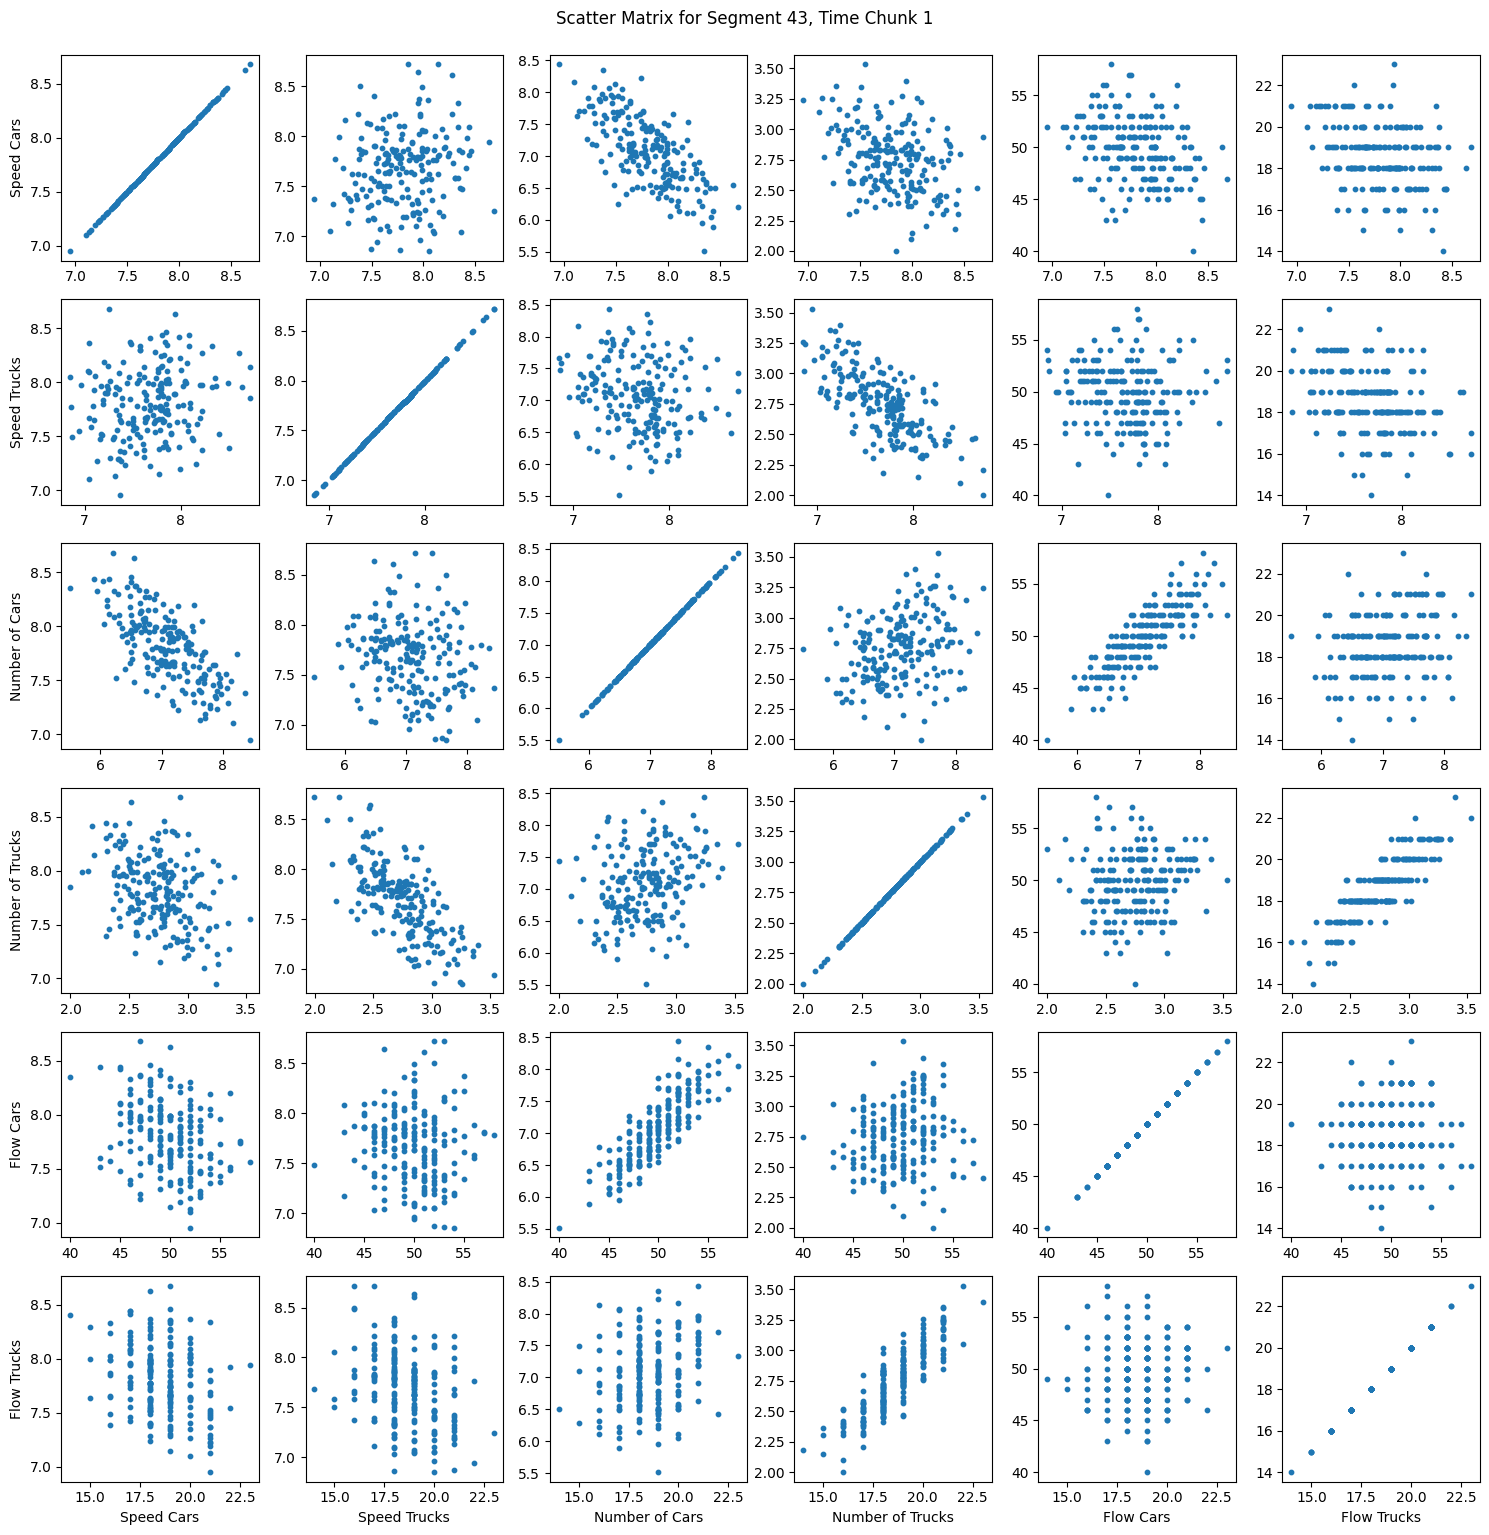

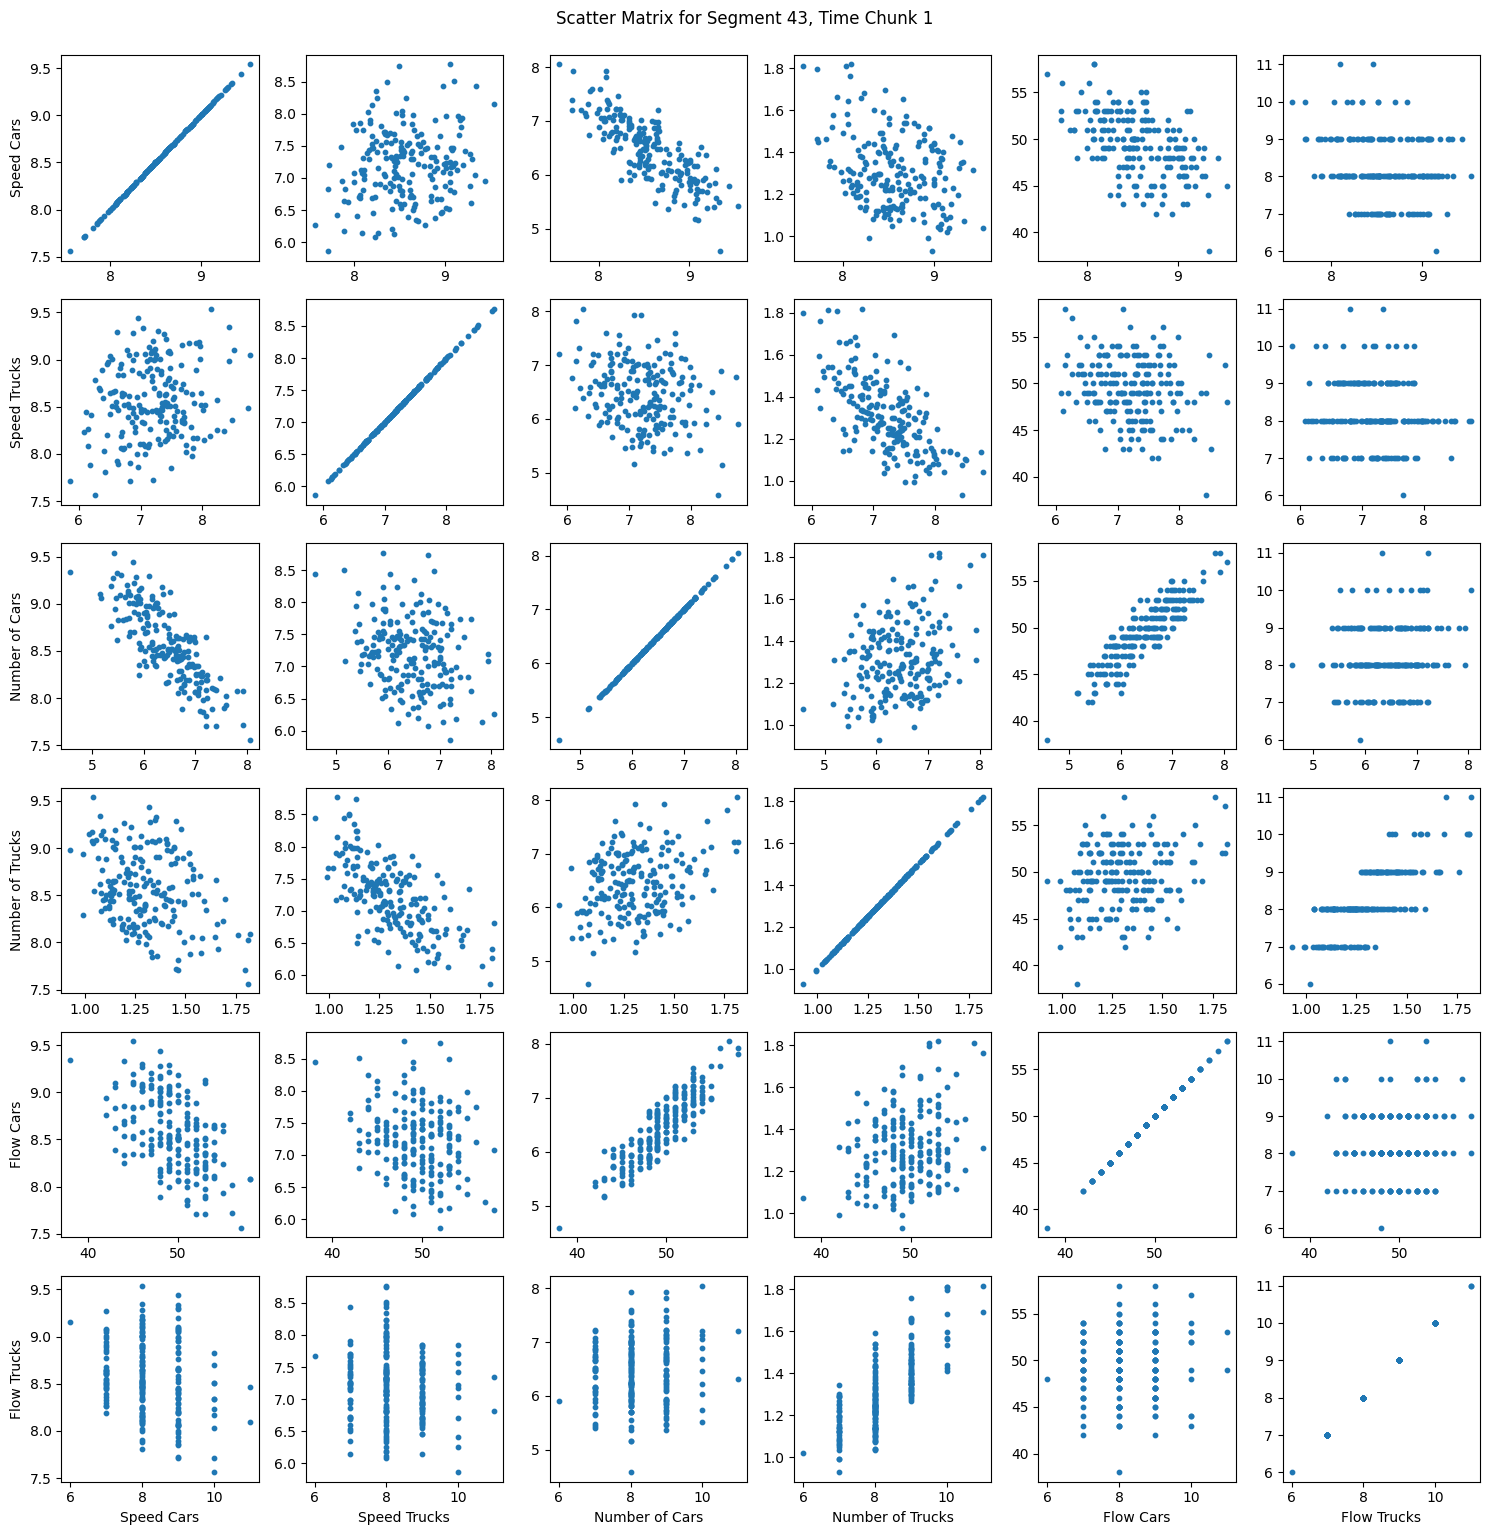

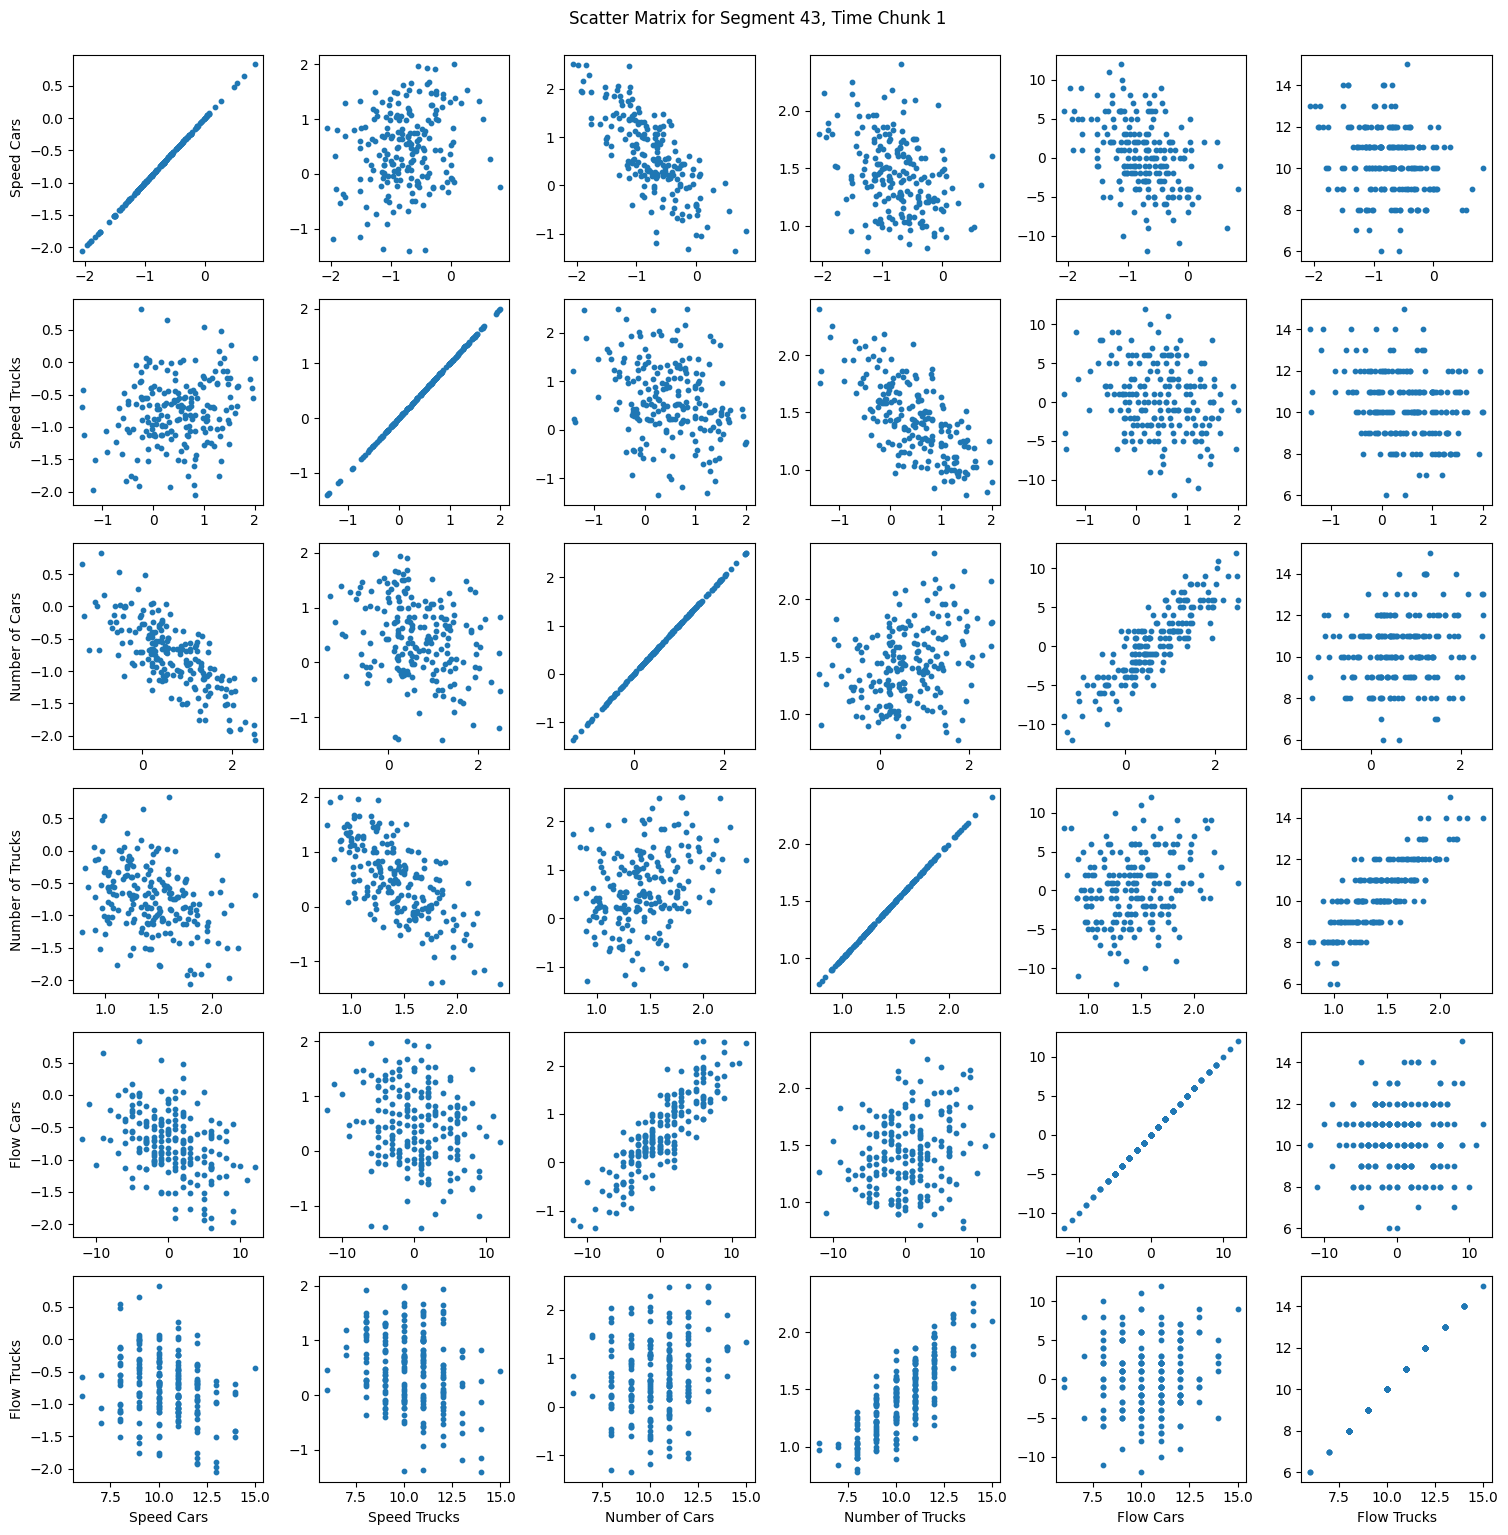

In [ ]:
# prompt: perform a scatter plot among variables to decide if we use Pearson or Spearman for correlation matrix

import matplotlib.pyplot as plt

def plot_scatter_matrix(variables, variable_names, k, t):
    num_vars = len(variables)
    fig, axes = plt.subplots(num_vars, num_vars, figsize=(15, 15))

    for i in range(num_vars):
        for j in range(num_vars):
            data_i = variables[i][:, k, t]
            data_j = variables[j][:, k, t]
            axes[i, j].scatter(data_i, data_j, s=10)  # Adjust marker size as needed

            if i == num_vars - 1:
                axes[i, j].set_xlabel(variable_names[j])
            if j == 0:
                axes[i, j].set_ylabel(variable_names[i])

    plt.tight_layout()
    plt.suptitle(f"Scatter Matrix for Segment {k}, Time Chunk {t+1}", y=1.02)
    plt.show()


# Example usage for scenario 0, time chunk 0, segment k
k = 43
t = 0
plot_scatter_matrix(variables_s0, variable_names, k, t)

# Example usage for scenario 1, time chunk 0, segment k
plot_scatter_matrix(variables_s1, variable_names, k, t)

# Example usage for residuals, time chunk 0, segment k
plot_scatter_matrix(residuals, variable_names, k, t)

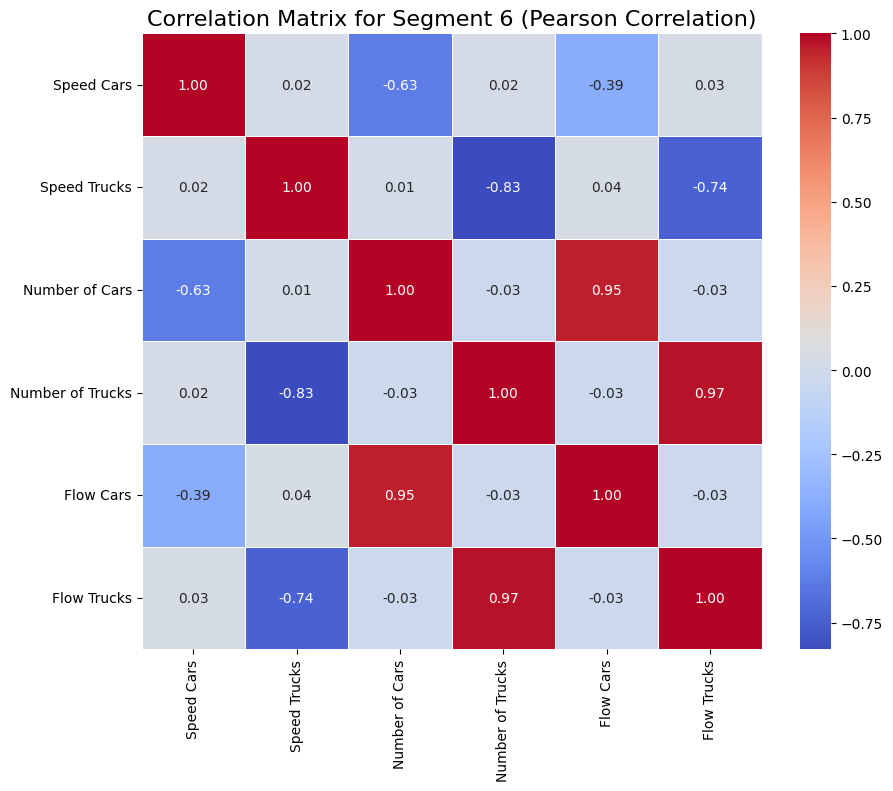

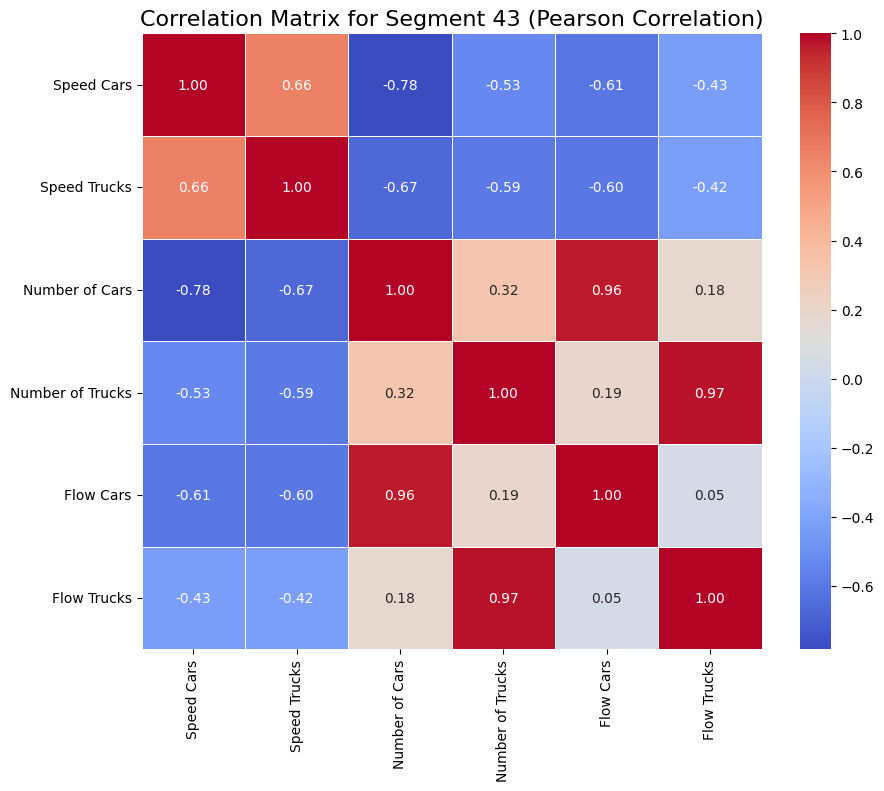

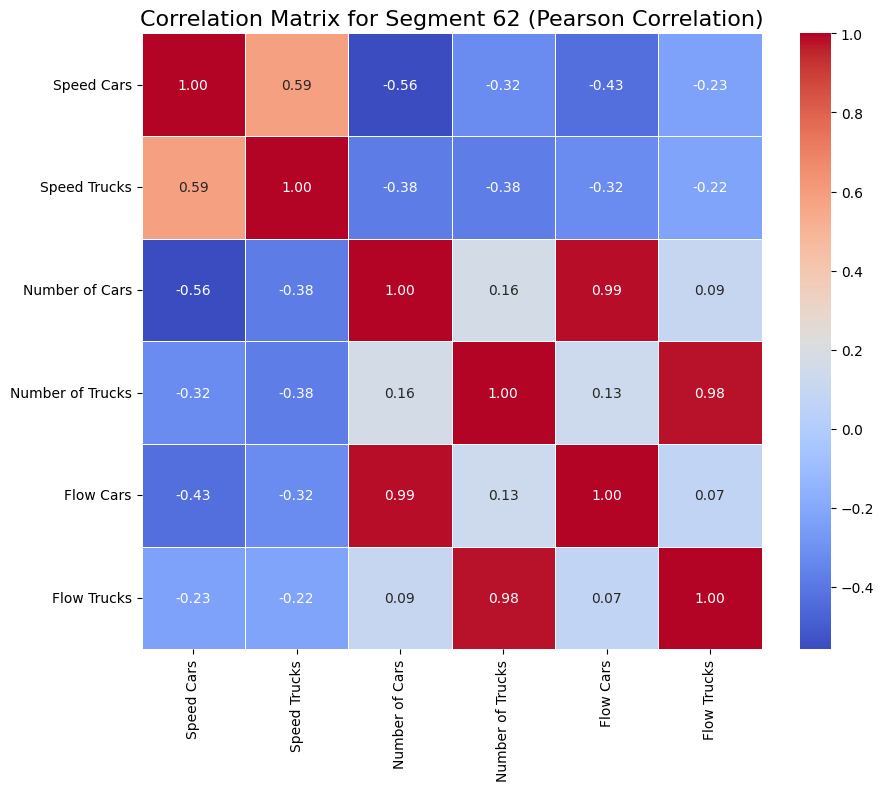

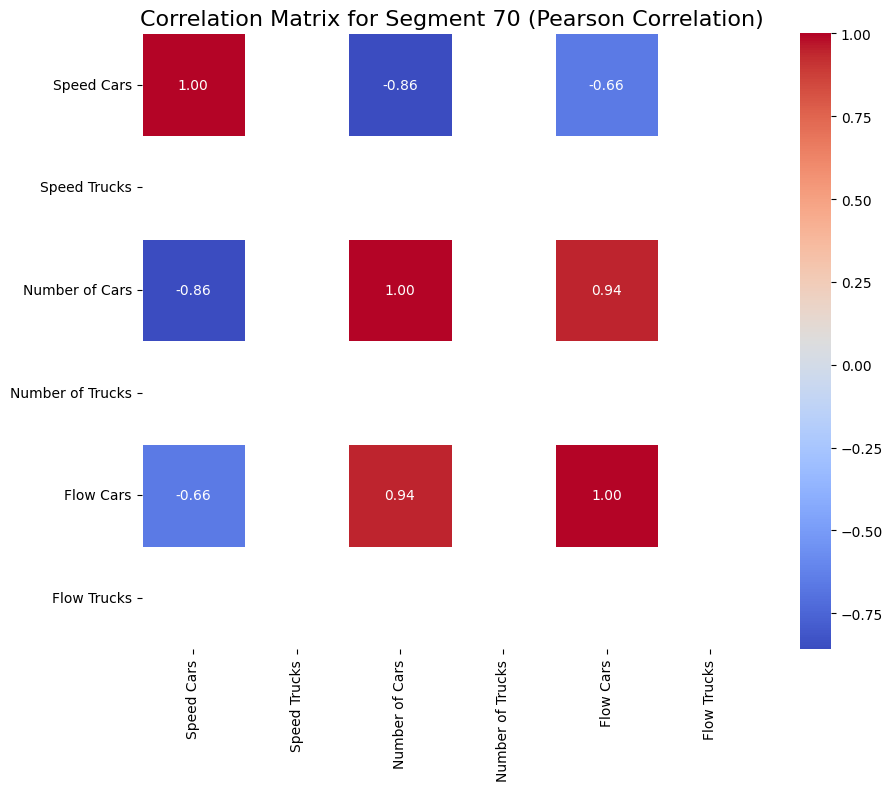

In [ ]:
# prompt: plot the correlation matrix based on pearson correlation, i want the correlation matrix of the aggregration of the varibales for the interesting k segments,

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(variables, variable_names, k):
    # Aggregate data for the specified segment k across all time chunks
    aggregated_data = [var[:, k, :].mean(axis=1) for var in variables]  # Mean across time chunks

    # Create a DataFrame for easier correlation calculation
    df = pd.DataFrame(aggregated_data).transpose()
    df.columns = variable_names

    # Calculate the correlation matrix using Pearson correlation
    correlation_matrix = df.corr(method='spearman')

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Correlation Matrix for Segment {k} (Spearman Correlation)", fontsize=16)
    plt.show()

# Example usage for residuals
interesting_k = [6, 43, 62, 70]
for k in interesting_k:
    plot_correlation_matrix(residuals, variable_names, k)

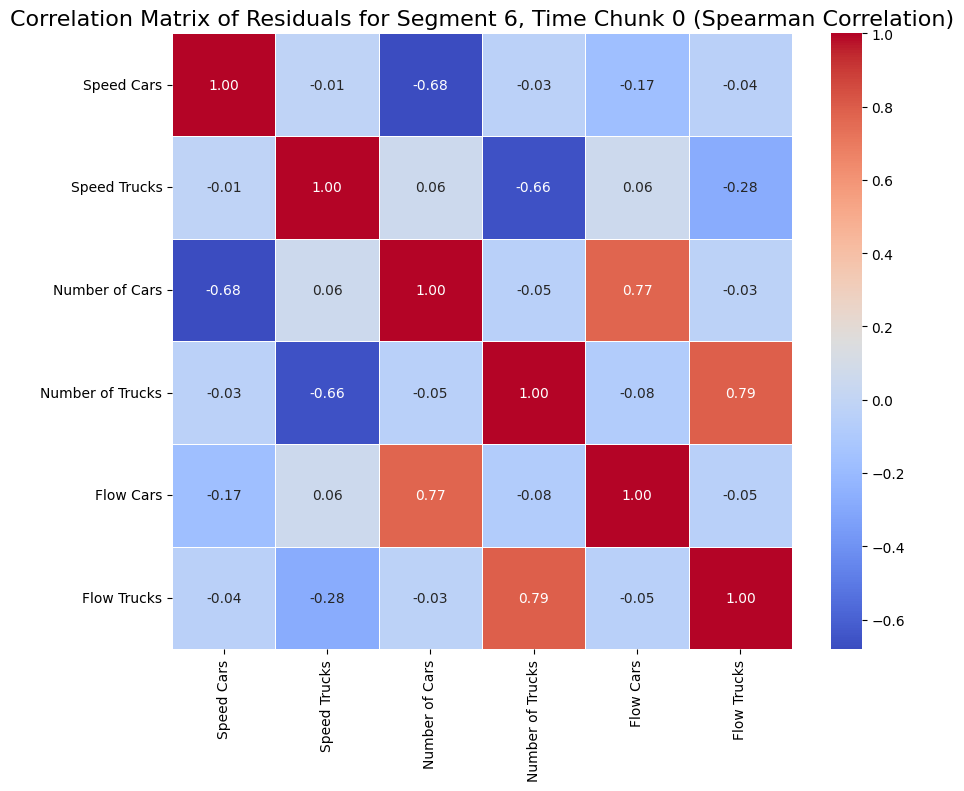

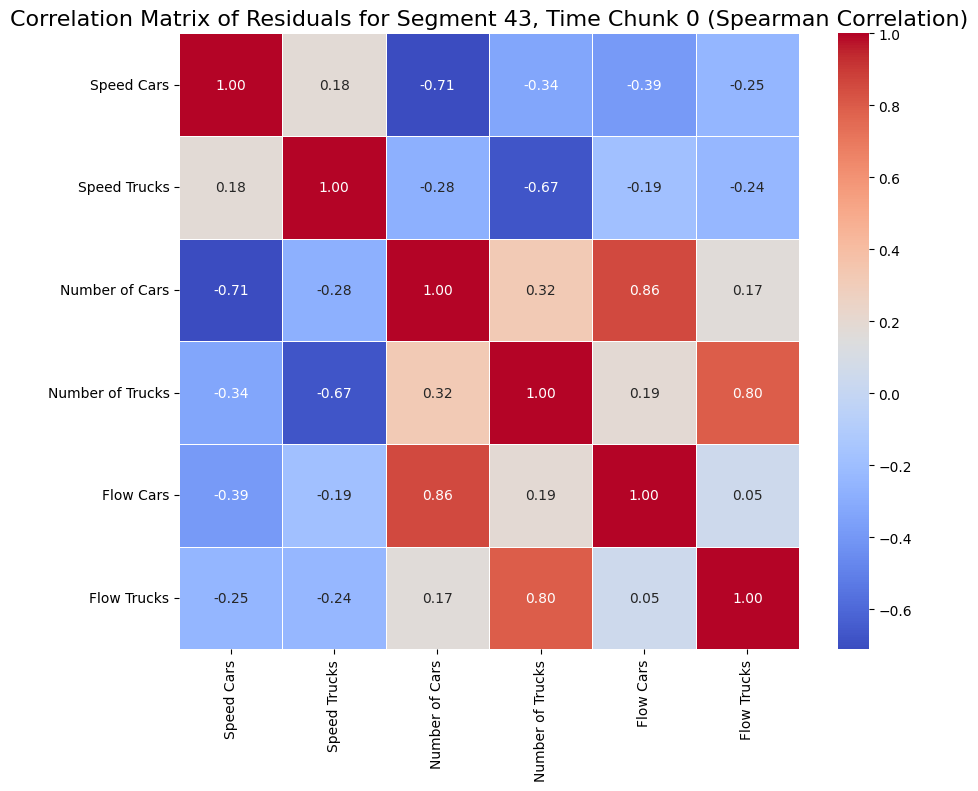

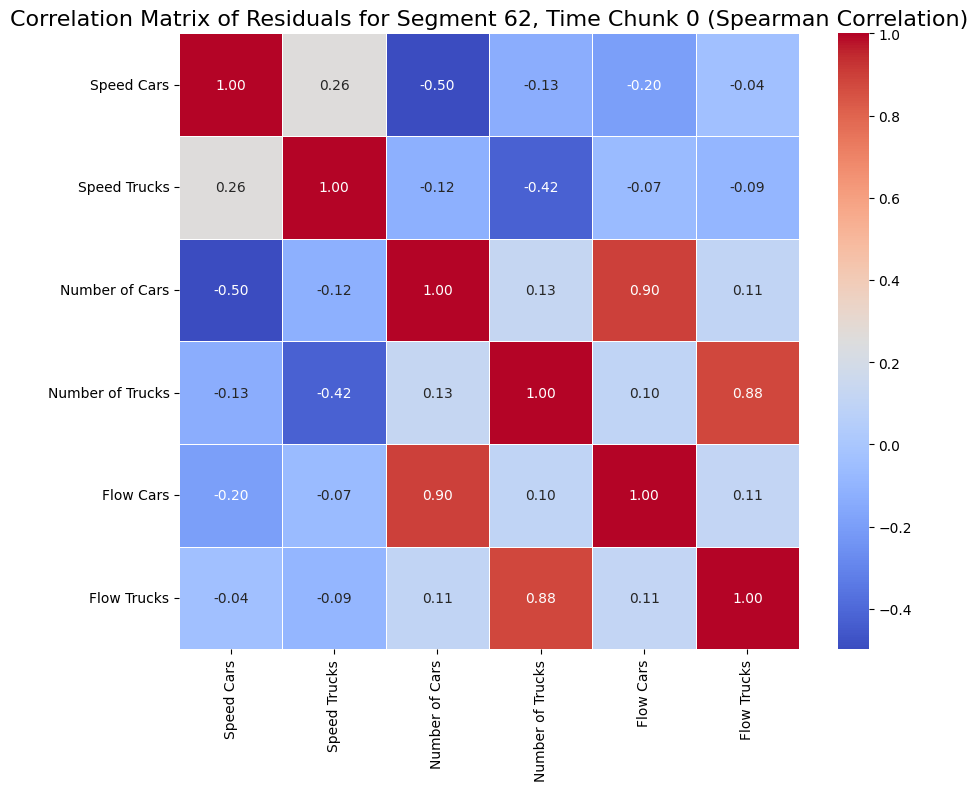

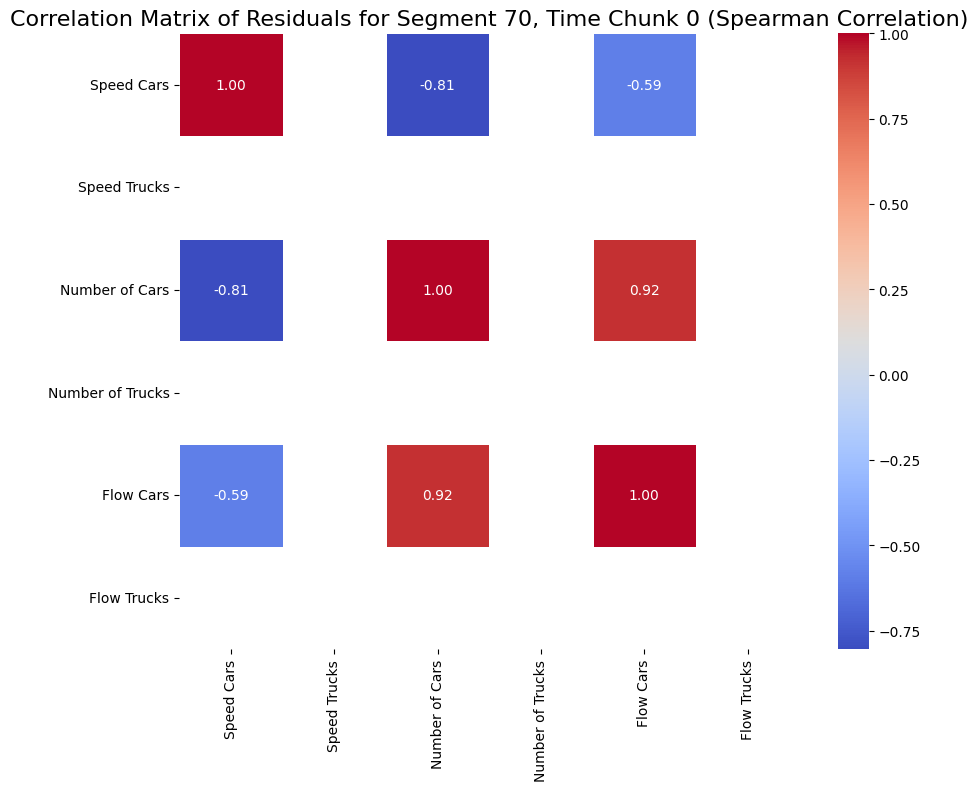

In [ ]:
# prompt: i want to see the correlation matrix of the residuals

def plot_correlation_matrix_residuals(residuals, variable_names, k, t):
    # Extract data for the specified segment k and time chunk t
    data_at_k_t = [var[:, k, t] for var in residuals]

    # Create a DataFrame for easier correlation calculation
    df = pd.DataFrame(data_at_k_t).transpose()
    df.columns = variable_names

    # Calculate the correlation matrix using Pearson correlation
    correlation_matrix = df.corr(method='spearman')

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Correlation Matrix of Residuals for Segment {k}, Time Chunk {t} (Spearman Correlation)", fontsize=16)
    plt.show()

# Example usage for residuals at a specific time chunk
interesting_k = [6, 43, 62, 70]
t = 0 # Example time chunk
for k in interesting_k:
    plot_correlation_matrix_residuals(residuals, variable_names, k, t)